# Crime Classification #

## Table of Contents ##

[Business Goal](#business_goal)

[1) Crime Type](#crime_type)

* [Random Forest Model](#random_forest)
    * [Classification Report](#classification_report)
    * [Confusion Matrix](#confusion_matrix)
    * [Classification Report Results](#classification_report_results)
    * [Confusion Matrix Results](#confusion_matrix_results)
    * [Interpreting Results](#interpreting_results)
    
    
* [Tuned Random Forest Model](#tuned_random_forest)
    * [Classification Report](#classification_report2)
    * [Confusion Matrix](#confusion_matrix2)
    * [Classification Report Results](#classification_report_results2)
    * [Confusion Matrix Results](#confusion_matrix_results2)
    * [Interpreting Results](#interpreting_results2)
    
    
* [CatBoost Model](#catboost)
    * [Classification Report](#classification_report3)
    * [Confusion Matrix](#confusion_matrix3)
    * [Classification Report Results](#classification_report_results3)
    * [Confusion Matrix Results](#confusion_matrix_results3)
    * [Interpreting Results](#interpreting_results3)
    
    
* [Tuned CatBoost Model](#catboost2)
    * [Classification Report](#classification_report4)
    * [Confusion Matrix](#confusion_matrix4)
    * [Classification Report Results](#classification_report_results4)
    * [Confusion Matrix Results](#confusion_matrix_results4)
    * [Interpreting Results](#interpreting_results4)
 
 
[2) Crime Location](#crime_location)

* [CatBoost Model](#catboost3)
    * [Classification Report](#classification_report5)
    * [Confusion Matrix](#confusion_matrix5)
    * [Classification Report Results](#classification_report_results5)
    * [Confusion Matrix Results](#confusion_matrix_results5)
    * [Interpreting Results](#interpreting_results5)
    
    
* [Tuned CatBoost Model](#catboost4)
    * [Classification Report](#classification_report6)
    * [Confusion Matrix](#confusion_matrix6)
    * [Classification Report Results](#classification_report_results6)
    * [Confusion Matrix Results](#confusion_matrix_results6)
    * [Interpreting Results](#interpreting_results6)
    
    
[Additional Analysis](#additional_analysis)


[Final Results](#final_results)


[Conclusion](#conclusion)


[Recommendations](#recommendations)

<a id='business_goal'></a>

## Business Goal ##

We'll be working with the great city of Seattle. Using classification algorithms (Random Forest and CatBoost), we'll create two separate models to predict not only location of new crimes, but also type. Creating successful models will help to reduce crime and make Seattle a safer place. Once proven successful, the model can potentially be generalized to other parts of Washington, and even other states.

## Data ##

The data itself came from the city of Seattle's website. The crime dataset, which ranges from 2008-present is publicly available at https://data.seattle.gov/Public-Safety/SPD-Crime-Data-2008-Present/tazs-3rd5. The data contained well over 1 million rows of data, and 17 variables.

# Getting Started #

<a id='crime_type'></a>

We'll be creating two different models in this notebook: One for crime type, and one for crime location. We'll start off with crime type, and experiment with different classification algorithms to find out best model.

# 1) Crime Type #

**Importing our libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier, Pool, metrics, cv
from IPython.display import IFrame
from IPython.display import Image
from IPython.core.display import HTML 
import time

### Opening Datafile ###

**In a separate notebook, we preprocessed our "SPD_Crime_Data" file, and saved it as a new CSV file. We'll now open that file to use for our models.**

In [2]:
df = pd.read_csv("preprocessed_data.csv")
df

,Crime Against Category,Offense,Sector,Beat,MCPP,Time,Day,Year
0,2,Theft of Motor Vehicle Parts or Accessories,11,22,50,661,0,0
1,2,Robbery,22,50,50,1753,6,0
2,2,Destruction/Damage/Vandalism of Property,18,39,33,124,2,0
3,2,Shoplifting,14,29,16,2005,1,0
4,2,Destruction/Damage/Vandalism of Property,11,22,44,1753,1,0
...,...,...,...,...,...,...,...,...
210254,2,Theft of Motor Vehicle Parts or Accessories,13,28,29,0,2,2
210255,2,Motor Vehicle Theft,19,42,34,508,3,2
210256,1,Simple Assault,9,15,51,1121,4,2
210257,1,Simple Assault,9,14,45,938,1,2


### Setting Up For Initial Model ###

**Let's start off by first identifying our target variable**

In [3]:
X = df.drop("Offense", axis = 1)

#Target Variable
y = df["Offense"]

**Now we'll split our data using Train Test Split**

In [4]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

**We'll scale our data, to make it easier for the model to work with**

In [5]:
#Initializing StandardScaler
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

**Let's look at the value counts for our dependent variable, to see if there's an imbalance of data**

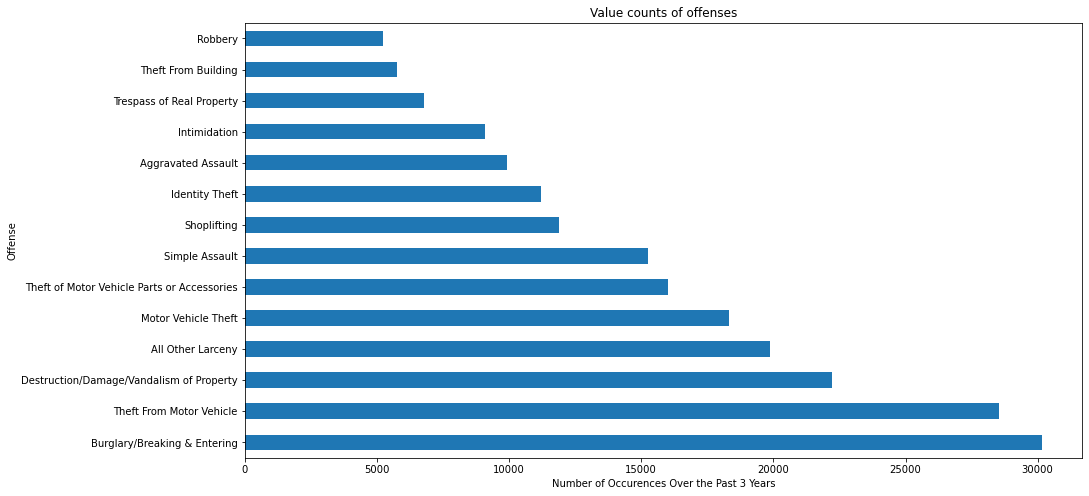

In [6]:
#Creating bar graph
ax = df.value_counts('Offense').plot.barh(figsize = (15,8), title = "Value counts of offenses");
ax.set_xlabel("Number of Occurences Over the Past 3 Years");

**We can see that there's an imbalance of data, where there's a massive difference between the highest occuring crimes (Burglary/Breaking & Entering crimes) and others. This imbalance can cause all sorts of problems for our model performance, so let's use SMOTE to address that**

In [7]:
#Initializing SMOTE
sm = SMOTE(random_state = 1)
X_train, y_train = sm.fit_sample(X_train, y_train)

**Now it's time to create our initial model.**

<a id='random_forest'></a>

# Random Forest Model #

**We'll start off by using a Random Forest model, since Random Forest is a great model to use for classification purposes due to reduced overfitting**

In [8]:
#Creating initial RF model
rf = RandomForestClassifier(criterion= "entropy",random_state = 1,  max_depth = 5)
rf.fit(X_train, y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

**After we run our initial model, we want to look at metrics like precision, recall, F1 score, false positive/negative instances, etc. Let's create our classification report and confusion matrices, so we can take a look at these metrics**

<a id='classification_report'></a>

### Classification Report ###

**Printing our training results**

In [9]:
print(classification_report(y_train, rf_train_pred))

C:\Users\aleja\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                             precision    recall  f1-score   support

                         Aggravated Assault       0.38      0.61      0.47     22703
                          All Other Larceny       0.00      0.00      0.00     22703
               Burglary/Breaking & Entering       0.19      0.14      0.16     22703
   Destruction/Damage/Vandalism of Property       0.20      0.00      0.00     22703
                             Identity Theft       0.26      0.85      0.39     22703
                               Intimidation       0.47      0.32      0.38     22703
                        Motor Vehicle Theft       0.22      0.06      0.09     22703
                                    Robbery       0.23      0.11      0.15     22703
                                Shoplifting       0.19      0.47      0.27     22703
                             Simple Assault       0.39      0.28      0.33     22703
                        Theft From Building       0.15      0.24

**Printing our testing results**

In [10]:
print(classification_report(y_test, rf_test_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.33      0.57      0.42      2493
                          All Other Larceny       0.00      0.00      0.00      4879
               Burglary/Breaking & Entering       0.30      0.13      0.18      7460
   Destruction/Damage/Vandalism of Property       0.20      0.00      0.00      5540
                             Identity Theft       0.18      0.86      0.29      2921
                               Intimidation       0.37      0.31      0.34      2250
                        Motor Vehicle Theft       0.22      0.06      0.10      4563
                                    Robbery       0.07      0.10      0.08      1319
                                Shoplifting       0.14      0.46      0.22      2975
                             Simple Assault       0.48      0.29      0.36      3790
                        Theft From Building       0.05      0.22

<a id='confusion_matrix'></a>

### Confusion Matrix ###

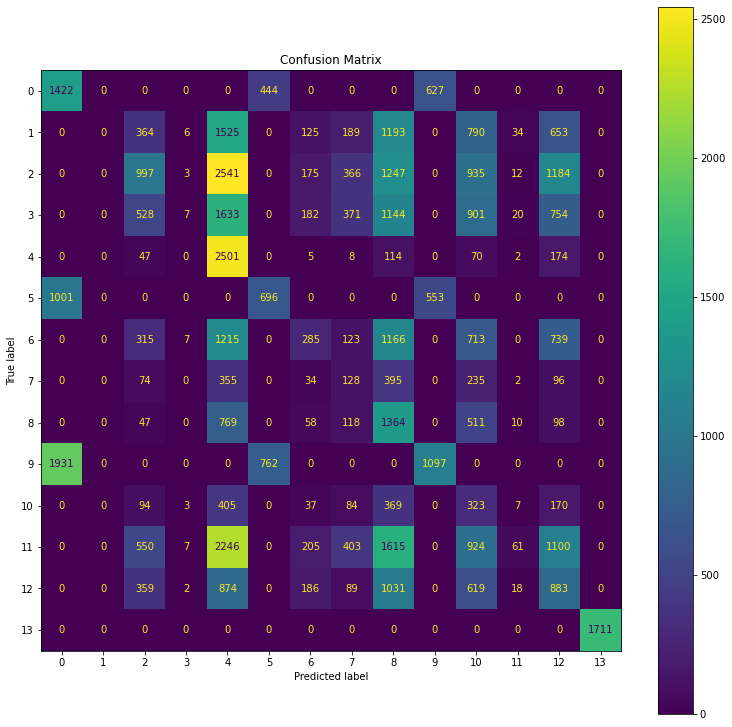

In [11]:
#Create Confusion matrix, but without the labels
cm = confusion_matrix(y_test, rf_test_pred);

#Labels not added for readability purposes
cmp = ConfusionMatrixDisplay(cm);

fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

### Crime Key ###

**To make our confusion matrix results more readable, we represented the crime categories as numeric values. Below is a key that matches the numeric value to the crime**

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Intimidation

5) Motor Vehicle Theft

6) Shoplifting

7) Simple Assault

8) Theft From Motor Vehicle

9) Theft of Motor Vehicle Parts or Accessories

10) Theft From Building

11) Theft From Motor Vehicle

12) Theft of Motor Vehicle Parts or Accessories

13) Trespass of Real Property


<a id='classification_report_results'></a>

### Classification Report Results ###

**Let's take a look at our test model classification report results for each crime:**

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .33, a recall score of .57, and an f1 score of .42. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 33% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 57% of them.
* There is an f1 score of .42, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .0, a recall score of .0, and an f1 score of .0. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 0% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 0% of them.
* There is an f1 score of 0, indicating the worst possible performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .30, a recall score of .13, and an f1 score of .18. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 30% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 13% of them.
* There is an f1 score of .18, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .20, a recall score of 0, and an f1 score of 0. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 20% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 0% of them.
* There is an f1 score of 0, indicating the worst possible performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .18, a recall score of .86, and an f1 score of .29. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 18% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 86% of them.
* There is an f1 score of .29, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .37, a recall score of .31, and an f1 score of .34. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 37% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 31% of them.
* There is an f1 score of .34, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .22, a recall score of .06, and an f1 score of .10. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 22% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 6% of them.
* There is an f1 score of .10, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .07, a recall score of .10, and an f1 score of .08. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 7% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 10% of them.
* There is an f1 score of .08, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .14, a recall score of .46, and an f1 score of .22. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 14% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 46% of them.
* There is an f1 score of .22, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .48, a recall score of .29, and an f1 score of .36. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 48% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 29% of them.
* There is an f1 score of .36, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .05, a recall score of .22, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 5% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 22% of them.
* There is an f1 score of .09, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .37, a recall score of .01, and an f1 score of .02. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 37% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 1% of them.
* There is an f1 score of .02, indicating extremely poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .15, a recall score of .22, and an f1 score of .18. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 15% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 22% of them.
* There is an f1 score of .18, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

<a id='confusion_matrix_results'></a>

### Confusion Matrix Results ###

Let's take a look at our instances of true positives/negatives and false positives/negatives from our confusion matrix. Before we look at our results, let's look at what these instances mean again (in order of our results): 

* When it comes to crime type, true positives refer to how many crimes were correctly predicted as being a certain crime type. We want high instances of true positives, since this gives us a good idea about how many crimes our model accurately predicts.


* When it comes to crime type, false negative refers to how many crimes were wrongly predicted as not belonging to a certain category of crime. We want low instances of false negatives. High instances of false negatives in a real-world could mean that the wrong police action is taken, or even that someone could get charged for the wrong crime. Someone who's guilty of committing a higher offense could get charged with something less, and therefore do less time. Alternatively, someone who's guilty of committing a lessser crime could get charged with something more serious and therefore do more time.


* When it comes to crime type, false positives refers to how many crimes were wrongly predicted as belonging to a certain crime category. Again, we want low instances of this type of error. The ramifications of false positives are similar to that of false negatives, where wrong police action could be taken, and when it comes to charging for a crime, the wrong charges would be applied.


* Lastly, when it comes to crime type, true negatives refer to how many crimes were correctly predicted as not belonging to a certain crime type. We want these instances to be high. 

**Now let's take a look at our results:**

**0) Aggravated Assault**

* 1422 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,071 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 2,932 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,851 crimes were correctly predicted as not being "Aggravated Assault" crimes

We can see:

* We have high instances of true positives, meaning our model is classifying a large amount of crimes correctly as being Aggravated Assault crimes


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit an Aggravated assault crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have high instances of false positives. Again, this could mean that wrong police action is taken, and the wrong amount of police officers are sent to that crime. Additionally, this could mean that someone who did not commit an Aggravated Assault crime, will get sentenced wrongly. They'll either receive a higher or lower sentence than they deserve, which is not ideal


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**1) All Other Larceny**

* 0 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,879 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 0 crimes were wrongly predicted as being "All Other Larceny" crimes
* 47,686 crimes were correctly predicted as not being "All Other Larceny" crimes


We can see:

* We have 0 instances of true positives, which is a bad sign. That means our model does not have any instances of predicting Larceny crimes correctly


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit a Larceny crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have 0 instances of false positives. While this would usually be good, and would mean that our model did not misclassify any crimes as Larceny crimes, and that all of our classified Larceny crimes are correct, it's contradicted by our 0 true positive instances


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances, when looking at results

**2) Burglary/Breaking & Entering**

* 997 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 6,463 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 2,378 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 43,091 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes


We can see:

* We have high instances of true positives, meaning our model is classifying a large amount of crimes correctly as being Burglary/Breaking & Entering crimes


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit a Burglary/Breaking & Entering crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have high instances of false positives. Again, this could mean that wrong police action is taken, and the wrong amount of police officers are sent to that crime. Additionally, this could mean that someone who did not commit a Burglary/Breaking & Entering crime, will get sentenced wrongly. They'll either receive a higher or lower sentence than they deserve, which is not ideal


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**3) Destruction/Damage/Vandalism of Property**

* 7 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 5,533 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 28 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 47,525 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes


We can see:

* We have very low instances of true positives, which is a bad sign. That means our model does not predict  Destruction/Damage/Vandalism of Property crimes very well


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit a Destruction/Damage/Vandalism of Property crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have low instances of false positives. While this would usually be good, and would mean that our model did not misclassify many crimes as Destruction/Damage/Vandalism of Property crimes, and that most of of our classified Destruction/Damage/Vandalism of Property crimes are correct, it's contradicted by our low count of true positive instances


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**4) Identity Theft**

* 2,501 crimes were correctly predicted as being "Identity Theft" crimes
* 420 crimes were wrongly predicted as not being "Identity Theft" crimes
* 11,563 crimes were wrongly predicted as being "Identity Theft" crimes
* 44,701 crimes were correctly predicted as not being "Identity Theft" crimes



We can see:

* We have high instances of true positives, meaning our model is classifying a large amount of crimes correctly as being Identity Theft crimes


* We have low instances of false negatives. This is a good sign, and means that only a few (hundred) Identity Theft crimes were misclassified/mispredicted. This means there would be less incorrect police action, and less instances of wrongful charges/sentencings 


* We have very high instances of false positives. Again, this could mean that wrong police action is taken, and the wrong amount of police officers are sent to that crime. Additionally, this could mean that someone who did not commit an Identity Theft crime, will get sentenced wrongly. They'll either receive a higher or lower sentence than they deserve, which is not ideal


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**5) Intimidation**

* 696 crimes were correctly predicted as being "Intimidation" crimes
* 1,554 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,206 crimes were wrongly predicted as being "Intimidation" crimes
* 50,554 crimes were correctly predicted as not being "Intimidation" crimes


We can see:

* We have high instances of true positives, meaning our model is classifying a large amount of crimes correctly as being Intimidation crimes


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit an Intimidation crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have high instances of false positives. Again, this could mean that wrong police action is taken, and the wrong amount of police officers are sent to that crime. Additionally, this could mean that someone who did not commit an Intimidation crime, will get sentenced wrongly. They'll either receive a higher or lower sentence than they deserve, which is not ideal


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**6) Motor Vehicle Theft**

* 285 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 4,278 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 1,007 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 49,056 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes


We can see:

* We have low instances of true positives, which is a bad sign. That means our model does not predict Motor Vehicle Theft crimes very well


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit a Motor Vehicle Theft crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have high instances of false positives. Again, this could mean that wrong police action is taken, and the wrong amount of police officers are sent to that crime. Additionally, this could mean that someone who did not commit a Motor Vehicle Theft crime, will get sentenced wrongly. They'll either receive a higher or lower sentence than they deserve, which is not ideal


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**7) Robbery**

* 128 crimes were correctly predicted as being "Robbery" crimes
* 1,191 crimes were wrongly predicted as not being "Robbery" crimes
* 1,751 crimes were wrongly predicted as being "Robbery" crimes
* 51,015 crimes were correctly predicted as not being "Robbery" crimes


We can see:

* We have low instances of true positives, which is a bad sign. That means our model does not predict Robbery crimes very well


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit a Robbery crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have high instances of false positives. Again, this could mean that wrong police action is taken, and the wrong amount of police officers are sent to that crime. Additionally, this could mean that someone who did not commit a Robbery crime, will get sentenced wrongly. They'll either receive a higher or lower sentence than they deserve, which is not ideal


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**8) Shoplifting**

* 1,364 crimes were correctly predicted as being "Shoplifting" crimes
* 1,611 crimes were wrongly predicted as not being "Shoplifting" crimes
* 8,274 crimes were wrongly predicted as being "Shoplifting" crimes
* 47,567 crimes were correctly predicted as not being "Shoplifting" crimes


We can see:

* We have high instances of true positives, meaning our model is classifying a large amount of crimes correctly as being Shoplifting crimes


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit a Shoplifting crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have high instances of false positives. Again, this could mean that wrong police action is taken, and the wrong amount of police officers are sent to that crime. Additionally, this could mean that someone who did not commit a Shoplifting crime, will get sentenced wrongly. They'll either receive a higher or lower sentence than they deserve, which is not ideal


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**9) Simple Assault**

* 1,097 crimes were correctly predicted as being "Simple Assault" crimes
* 2,693 crimes were wrongly predicted as not being "Simple Assault" crimes
* 1,180 crimes were wrongly predicted as being "Simple Assault" crimes
* 51,465 crimes were correctly predicted as not being "Simple Assault" crimes


We can see:

* We have high instances of true positives, meaning our model is classifying a large amount of crimes correctly as being Simple Assault crimes


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit a Simple Assault crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have high instances of false positives. Again, this could mean that wrong police action is taken, and the wrong amount of police officers are sent to that crime. Additionally, this could mean that someone who did not commit a Simple Assault crime, will get sentenced wrongly. They'll either receive a higher or lower sentence than they deserve, which is not ideal


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**10) Theft From Building**

* 323 crimes were correctly predicted as being "Theft From Building" crimes
* 1,169 crimes were wrongly predicted as not being "Theft From Building" crimes
* 5,698 crimes were wrongly predicted as being "Theft From Building" crimes
* 50,519 crimes were correctly predicted as not being "Theft From Building" crimes

We can see:

* We have low instances of true positives, which is a bad sign. That means our model does not predict Theft From Building crimes very well


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit a Theft From Building crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have high instances of false positives. Again, this could mean that wrong police action is taken, and the wrong amount of police officers are sent to that crime. Additionally, this could mean that someone who did not commit a Theft From Building crime, will get sentenced wrongly. They'll either receive a higher or lower sentence than they deserve, which is not ideal


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**11) Theft From Motor Vehicle**

* 61 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 7,050 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 105 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 51,383 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

We can see:

* We have low instances of true positives, which is a bad sign. That means our model does not predict Theft From Motor Vehicle crimes very well


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit a Theft From Motor Vehicle crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have low instances of false positives. While this would usually be good, and would mean that our model did not misclassify many crimes as Theft From Motor Vehicle crimes, and that most of of our classified Theft From Motor Vehicle crimes are correct, it's contradicted by our low count of true positive instances


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**12) Theft of Motor Vehicle Parts or Accessories**

* 883 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,178 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 4,968 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,679 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

We can see:

* We have high instances of true positives, meaning our model is classifying a large amount of crimes correctly as being Theft of Motor Vehicle Parts or Accessories crimes


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit a Theft of Motor Vehicle Parts or Accessories crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have high instances of false positives. Again, this could mean that wrong police action is taken, and the wrong amount of police officers are sent to that crime. Additionally, this could mean that someone who did not commit a Theft of Motor Vehicle Parts or Accessories crime, will get sentenced wrongly. They'll either receive a higher or lower sentence than they deserve, which is not ideal


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances


**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes


We can see:

* We have high instances of true positives, meaning our model is classifying a large amount of crimes correctly as being Trespass of Real Property crimes


* We have 0 instances of false negatives. This is a good sign, and means that no Trespass of Real Property crimes were misclassified/mispredicted. This means there would be no incorrect police action, and no instances of wrongful charges/sentencings


* * We have 0 instances of false positives. While low instances are usually good, and would mean that our model did not misclassify any crimes as Trespass of Real Property crimes, and that all of our classified Trespass of Real Property crimes are correct, 0 instances is very unusual and could be indicative of overfitting. 



* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances


<a id='interpreting_results'></a>

## Interpreting Results ##

In order to determine what types of crimes our model will best predict, we want to look at various aspects of our classification report and confusion matrix. In particular (for our classification report) we want to look at recall, since that will give us the most realistic look at how our model performs. Recall in this case asks the question of "Out of the actual total number of a certain type of crime committed, how many crimes did our model accurately classify/predict to be that type?". We'll also take a look at the number of true positives, false negatives, false positives, and true negatives (for our confusion matrix). So let's take a look at our results:

 **Classification Report Results**
* There seems to be some overfitting occuring, as evident from the perfect precision, recall and F1 scores of Trespass of Real Property crimes as well as our training classification report results being better than our testing results.


* All our recall values seem to be low (below .57), except for our highest precision scores which belonged to Identity Theft crimes, with a recall value of .86, and Trespass of Real Property crimes (which had an improbable perfect 1.0 score). However the lowest recall scores belonged to Destruction/Damage/Vandalism of Property (0), All Other Larceny (0), and Theft From Motor Vehicle (0.01) crimes. 

* Our precision scores were also low (below .37) except for our highest precision score which belonged to Simple Assault crimes, with a precision value of .48, and again Trespass of Real Property with a perfect 1.0 score. The lowest precision scores belonged to All Other Larceny (0), Theft From Building (0.05), and Robbery (.07) crimes. 


* Our F1 scores were low as well. Our highest scores belonged to the Aggravated Assault crimes (.42), Simple Assault (.36), and Intimidaion (.34) crimes. The lowest F1 score belonged to Destruction/Damage/Vandalism of Property (0), All Other Larceny (0), and Theft From Motor Vehicle (.02) crimes, 

**Confusion Matrix Results**
* For our instances of true positives, the most instances belonged to Identity Theft crimes (2,501) , then Trespass of Real Property crimes (1,711), then Aggravated Assault crimes(1,422). The least instances belonged to All Other Larceny crimes (0), Destruction/Damage/Vandalism of Property crimes (7), and Theft From Motor Vehicle crimes (61).


* For our instances of false negatives, the most instances belonged to Theft From Motor Vehicle crimes (7,050), then Burglary/Breaking & Entering crimes (6,463), then Destruction/Damage/Vandalism of Property crimes (5,533). The least instances belonged to Trespass of Real Property crimes  (0), Identity Theft (420), and Aggravated Assault crimes (1,071).


* For our instances of false positives, the most instances belonged to Identity Theft crimes (11,563), then Shoplifting crimes (8,274), then Theft From Building crimes(5,698). The least instances belonged to both Trespass of Real Property and All Other Larceny crimes with 0 instances, followed by Destruction/Damage/Vandalism of Property crimes with 28 instances.


* Lastly, for our instances of true negatives, the most instances belonged to Theft of Motor Vehicle Parts or Accessories crimes (51,679), then Simple Assault crimes (51,465), then Theft From Motor Vehicle (51,383). The least instances belonged to  Burglary/Breaking & Entering crimes (43,091), Identity Theft crimes (44,701), and Destruction/Damage/Vandalism of Property crimes (47,525).

**From our results we can see that our model is overfitting. Despite this, most of our crimes have low recall, precision and F1 scores. Our model seems to best predict new crimes as Trespass of Real Property crimes, while doing a bad job of predicting  All Other Larceny crimes and Destruction/Damage/Vandalism of Property crimes (based on recall values, true positive values and false negative/positive values). Our model's best predictions however may be due to our model overfitting. Next, let's attempt to tune our random forest model to see if we can reduce overfitting, see a change in our classification report values, and perhaps see a clearer trend in predicting crimes.**

<a id='tuned_random_forest'></a>

# Tuned Random Forest Model #

Let's attempt to tune our random forest model, via Grid-search. We'll attempt to reduce the overfitting occuring, and we'll also see if using a grid search to find our optimal criteria will help modify our classification report values. 

**Let's create our Grid-search with our various parameters**

In [12]:
rf2 = RandomForestClassifier()

#Grid-search params
param_grid = {
    'criterion': ['entropy'],
    'random_state': [1],
    'max_depth': [1, 3, 5],
    'min_samples_split': [0.2, 0.3, 0.4 ],
    'min_samples_leaf': [0.1, 0.2, 0.3]
}


gs_rf = GridSearchCV(rf2, param_grid)
gs_rf.fit(X_train, y_train)
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.3,
 'random_state': 1}

**Next, let's create our new model with the Grid-search best parameters**

In [13]:
rf2 = RandomForestClassifier(criterion= "entropy",random_state = 1,  max_depth = 3, min_samples_leaf = 0.1, min_samples_split = 0.3)

rf2.fit(X_train, y_train)
rf_train_pred2 = rf2.predict(X_train)
rf_test_pred2 = rf2.predict(X_test)

In [14]:
rf_train_pred2 = rf2.predict(X_train)
rf_test_pred2 = rf2.predict(X_test)

**Again, we want to look at metrics like precision, recall, F1 score, false positive/negative instances, etc. Let's create our classification report and confusion matrices, so we can take a look at these metrics**

<a id='classification_report2'></a>

### Classification Report ###

**Printing our training results**

In [15]:
print(classification_report(y_train, rf_train_pred2))

C:\Users\aleja\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                             precision    recall  f1-score   support

                         Aggravated Assault       0.36      0.60      0.45     22703
                          All Other Larceny       0.00      0.00      0.00     22703
               Burglary/Breaking & Entering       0.15      0.20      0.17     22703
   Destruction/Damage/Vandalism of Property       0.00      0.00      0.00     22703
                             Identity Theft       0.22      0.85      0.35     22703
                               Intimidation       0.39      0.30      0.34     22703
                        Motor Vehicle Theft       0.16      0.07      0.10     22703
                                    Robbery       0.13      0.06      0.08     22703
                                Shoplifting       0.17      0.44      0.25     22703
                             Simple Assault       0.36      0.21      0.27     22703
                        Theft From Building       0.16      0.12

**Printing our testing results**

In [16]:
print(classification_report(y_test, rf_test_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.31      0.58      0.41      2493
                          All Other Larceny       0.00      0.00      0.00      4879
               Burglary/Breaking & Entering       0.24      0.19      0.22      7460
   Destruction/Damage/Vandalism of Property       0.00      0.00      0.00      5540
                             Identity Theft       0.17      0.85      0.28      2921
                               Intimidation       0.30      0.29      0.29      2250
                        Motor Vehicle Theft       0.17      0.07      0.10      4563
                                    Robbery       0.04      0.06      0.05      1319
                                Shoplifting       0.13      0.44      0.20      2975
                             Simple Assault       0.47      0.21      0.29      3790
                        Theft From Building       0.06      0.11

<a id='confusion_matrix2'></a>

### Confusion Matrix ###

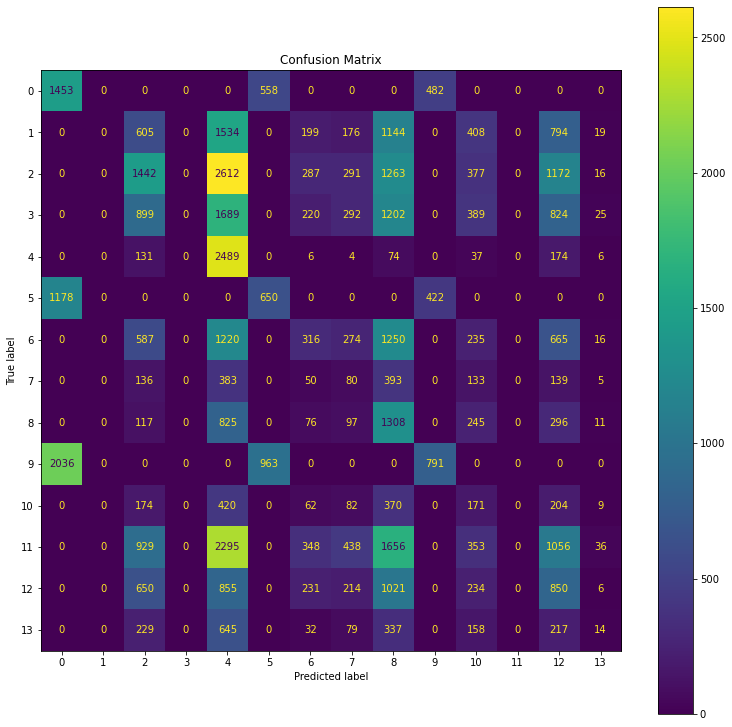

In [17]:
#Creating confusion matrix
cm2 = confusion_matrix(y_test, rf_test_pred2);
cmp2 = ConfusionMatrixDisplay(cm2);
fig, ax = plt.subplots(figsize=(13,13));
cmp2.plot(ax=ax);
cmp2.ax_.set_title("Confusion Matrix");

### Crime Key ###

**To make our confusion matrix more readable, we represented the crimes as numeric values. Below is a key that matches the numeric value to the crime**

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Intimidation

5) Motor Vehicle Theft

6) Shoplifting

7) Simple Assault

8) Theft From Motor Vehicle

9) Theft of Motor Vehicle Parts or Accessories

10) Theft From Building

11) Theft From Motor Vehicle

12) Theft of Motor Vehicle Parts or Accessories

13) Trespass of Real Property

<a id='classification_report_results2'></a>

### Classification Report Results ###

Let's take a look at our test model classification report results for each crime:

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .31, a recall score of .58, and an f1 score of .41. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 31% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 58% of them.
* There is an f1 score of .41, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of 0, a recall score of 0, and an f1 score of 0. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 0% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 0% of them.
* There is an f1 score of 0, indicating the worst possible performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .24, a recall score of .19, and an f1 score of .22. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 24% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 19% of them.
* There is an f1 score of .22, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of 0, a recall score of 0, and an f1 score of 0. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 0% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 0% of them.
* There is an f1 score of 0, indicating worst possible performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .17, a recall score of .85, and an f1 score of .28. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 17% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 85% of them.
* There is an f1 score of .28, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .30, a recall score of .29, and an f1 score of .29. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 30% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 29% of them.
* There is an f1 score of .29, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .17, a recall score of .07, and an f1 score of .10. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 17% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 7% of them.
* There is an f1 score of .10, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .04, a recall score of .06, and an f1 score of .05. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 4% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 6% of them.
* There is an f1 score of .05, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .13, a recall score of .44, and an f1 score of .20. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 13% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 44% of them.
* There is an f1 score of .20, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .47, a recall score of .21, and an f1 score of .29. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 47% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 21% of them.
* There is an f1 score of .29, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .06, a recall score of .11, and an f1 score of .08. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 6% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 11% of them.
* There is an f1 score of .08, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of 0, a recall score of 0, and an f1 score of 0. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 0% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 0% of them.
* There is an f1 score of .0, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .13, a recall score of .21, and an f1 score of .16. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 13% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 21% of them.
* There is an f1 score of .16, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of .09, a recall score of .01, and an f1 score of 0.1. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 9% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 1% of them.
* There is an f1 score of 0.1, indicating poor performance on predicting probability of the crime being a Trespass of Real Property crime.

<a id='confusion_matrix_results2'></a>

### Confusion Matrix Results ###

Let's take a look at our instances of true positives/negatives and false positives/negatives from our confusion matrix. Before we look at our results, let's look at what these instances mean again (in order of our results): 

* When it comes to crime type, true positives refer to how many crimes were correctly predicted as being a certain crime type. We want high instances of true positives, since this gives us a good idea about how many crimes our model accurately predicts.


* When it comes to crime type, false negative refers to how many crimes were wrongly predicted as not belonging to a certain category of crime. We want low instances of false negatives. High instances of false negatives in a real-world could mean that the wrong police action is taken, or even that someone could get charged for the wrong crime. Someone who's guilty of committing a higher offense could get charged with something less, and therefore do less time. Alternatively, someone who's guilty of committing a lessser crime could get charged with something more serious and therefore do more time.


* When it comes to crime type, false positives refers to how many crimes were wrongly predicted as belonging to a certain crime category. Again, we want low instances of this type of error. The ramifications of false positives are similar to that of false negatives, where wrong police action could be taken, and when it comes to charging for a crime, the wrong charges would be applied.


* Lastly, when it comes to crime type, true negatives refer to how many crimes were correctly predicted as not belonging to a certain crime type. We want these instances to be high. 

**Now let's take a look at our results:**

**0) Aggravated Assault**

* 1,453 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,040 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 3,214 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 46,858 crimes were correctly predicted as not being "Aggravated Assault" crimes

We can see: 

* We have high instances of true positives, meaning our model is classifying a large amount of crimes correctly as being Aggravated Assault crimes


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit an Aggravated assault crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have high instances of false positives. Again, this could mean that wrong police action is taken, and the wrong amount of police officers are sent to that crime. Additionally, this could mean that someone who did not commit an Aggravated Assault crime, will get sentenced wrongly. They'll either receive a higher or lower sentence than they deserve, which is not ideal


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**1) All Other Larceny**

* 0 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,879 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 0 crimes were wrongly predicted as being "All Other Larceny" crimes
* 47,686 crimes were correctly predicted as not being "All Other Larceny" crimes

We can see: 

* We have 0 instances of true positives, which is a bad sign. That means our model does not have any instances of predicting Larceny crimes correctly


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit a Larceny crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have 0 instances of false positives. While this would usually be good, and would mean that our model did not misclassify any crimes as Larceny crimes, and that all of our classified Larceny crimes are correct, it's contradicted by our 0 true positive instances


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**2) Burglary/Breaking & Entering**

* 1,442 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 6,018 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 4,457 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 41,253 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

We can see: 

* We have high instances of true positives, meaning our model is classifying a large amount of crimes correctly as being  Burglary/Breaking & Entering crimes


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit a Burglary/Breaking & Entering crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have high instances of false positives. Again, this could mean that wrong police action is taken, and the wrong amount of police officers are sent to that crime. Additionally, this could mean that someone who did not commit a Burglary/Breaking & Entering crime, will get sentenced wrongly. They'll either receive a higher or lower sentence than they deserve, which is not ideal


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**3) Destruction/Damage/Vandalism of Property**

* 0 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 5,540 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 0 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 47,924 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

We can see: 

* We have 0 instances of true positives, which is a bad sign. That means our model does not have any instances of predicting Destruction/Damage/Vandalism of Property crimes correctly


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit a Destruction/Damage/Vandalism of Property crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have 0 instances of false positives. While this would usually be good, and would mean that our model did not misclassify any crimes as Destruction/Damage/Vandalism of Property crimes, and that all of our classified Destruction/Damage/Vandalism of Property crimes are correct, it's contradicted by our 0 true positive instances


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**4) Identity Theft**

* 2,489 crimes were correctly predicted as being "Identity Theft" crimes
* 432 crimes were wrongly predicted as not being "Identity Theft" crimes
* 12,478 crimes were wrongly predicted as being "Identity Theft" crimes
* 43,132 crimes were correctly predicted as not being "Identity Theft" crimes


We can see:

* We have high instances of true positives, meaning our model is classifying a large amount of crimes correctly as being Identity Theft crimes


* We have low instances of false negatives. This is a good sign, and means that only a few (hundred) Identity Theft crimes were misclassified/mispredicted. This means there would be less incorrect police action, and less instances of wrongful charges/sentencings 


* We have very high instances of false positives. Again, this could mean that wrong police action is taken, and the wrong amount of police officers are sent to that crime. Additionally, this could mean that someone who did not commit an Identity Theft crime, will get sentenced wrongly. They'll either receive a higher or lower sentence than they deserve, which is not ideal


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**5) Intimidation**

* 650 crimes were correctly predicted as being "Intimidation" crimes
* 1,600 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,521 crimes were wrongly predicted as being "Intimidation" crimes
* 50,530 crimes were correctly predicted as not being "Intimidation" crimes


We can see:

* We have high instances of true positives, meaning our model is classifying a large amount of crimes correctly as being Intimidation crimes


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit an Intimidation crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have high instances of false positives. Again, this could mean that wrong police action is taken, and the wrong amount of police officers are sent to that crime. Additionally, this could mean that someone who did not commit an Intimidation crime, will get sentenced wrongly. They'll either receive a higher or lower sentence than they deserve, which is not ideal


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**6) Motor Vehicle Theft**

* 316 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 4,247 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 1,511 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 49,010 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes


We can see:

* We have low instances of true positives, which is a bad sign. That means our model does not predict Motor Vehicle Theft crimes very well


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit a Motor Vehicle Theft crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have high instances of false positives. Again, this could mean that wrong police action is taken, and the wrong amount of police officers are sent to that crime. Additionally, this could mean that someone who did not commit a Motor Vehicle Theft crime, will get sentenced wrongly. They'll either receive a higher or lower sentence than they deserve, which is not ideal


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**7) Robbery**

* 80 crimes were correctly predicted as being "Robbery" crimes
* 1,239 crimes were wrongly predicted as not being "Robbery" crimes
* 1,947 crimes were wrongly predicted as being "Robbery" crimes
* 50,905 crimes were correctly predicted as not being "Robbery" crimes

We can see:

* We have low instances of true positives, which is a bad sign. That means our model does not predict Robbery crimes very well


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit a Robbery crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have high instances of false positives. Again, this could mean that wrong police action is taken, and the wrong amount of police officers are sent to that crime. Additionally, this could mean that someone who did not commit a Robbery crime, will get sentenced wrongly. They'll either receive a higher or lower sentence than they deserve, which is not ideal


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**8) Shoplifting**

* 1,308 crimes were correctly predicted as being "Shoplifting" crimes
* 1,611 crimes were wrongly predicted as not being "Shoplifting" crimes
* 8,274 crimes were wrongly predicted as being "Shoplifting" crimes
* 66,801 crimes were correctly predicted as not being "Shoplifting" crimes

We can see:

* We have high instances of true positives, meaning our model is classifying a large amount of crimes correctly as being Shoplifting crimes


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit a Shoplifting crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have high instances of false positives. Again, this could mean that wrong police action is taken, and the wrong amount of police officers are sent to that crime. Additionally, this could mean that someone who did not commit a Shoplifting crime, will get sentenced wrongly. They'll either receive a higher or lower sentence than they deserve, which is not ideal


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**9) Simple Assault**

* 791 crimes were correctly predicted as being "Simple Assault" crimes
* 2,999 crimes were wrongly predicted as not being "Simple Assault" crimes
* 904 crimes were wrongly predicted as being "Simple Assault" crimes
* 51,771 crimes were correctly predicted as not being "Simple Assault" crimes


We can see:

* We have high instances of true positives, meaning our model is classifying a large amount of crimes correctly as being Simple Assault crimes


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit a Simple Assault crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have high instances of false positives. Again, this could mean that wrong police action is taken, and the wrong amount of police officers are sent to that crime. Additionally, this could mean that someone who did not commit a Simple Assault crime, will get sentenced wrongly. They'll either receive a higher or lower sentence than they deserve, which is not ideal


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**10) Theft From Building**

* 171 crimes were correctly predicted as being "Theft From Building" crimes
* 1,312 crimes were wrongly predicted as not being "Theft From Building" crimes
* 2,569 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,433 crimes were correctly predicted as not being "Theft From Building" crimes

We can see:

* We have low instances of true positives, which is a bad sign. That means our model does not predict Theft From Building crimes very well


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit a Theft From Building crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have high instances of false positives. Again, this could mean that wrong police action is taken, and the wrong amount of police officers are sent to that crime. Additionally, this could mean that someone who did not commit a Theft From Building crime, will get sentenced wrongly. They'll either receive a higher or lower sentence than they deserve, which is not ideal


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**11) Theft From Motor Vehicle**

* 0 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 7,111 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 0 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 51,470 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes


We can see:

* We have 0 instances of true positives, which is a bad sign. That means our model does not have any instances of predicting Theft From Motor Vehicle crimes correctly


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit a Theft From Motor Vehicle crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have 0 instances of false positives. While this would usually be good, and would mean that our model did not misclassify any crimes as Theft From Motor Vehicle crimes, and that all of our classified Theft From Motor Vehicle crimes are correct, it's contradicted by our 0 true positive instances


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances, when looking at results

**12) Theft of Motor Vehicle Parts or Accessories**

* 850 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,211 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 5,541 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,489 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

We can see:

* We have high instances of true positives, meaning our model is classifying a large amount of crimes correctly as being Theft of Motor Vehicle Parts or Accessories crimes


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit a Theft of Motor Vehicle Parts or Accessories crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have high instances of false positives. Again, this could mean that wrong police action is taken, and the wrong amount of police officers are sent to that crime. Additionally, this could mean that someone who did not commit a Theft of Motor Vehicle Parts or Accessories crime, will get sentenced wrongly. They'll either receive a higher or lower sentence than they deserve, which is not ideal


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances


**13) Trespass of Real Property**

* 14 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 1,697 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 149 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,854 crimes were correctly predicted as not being "Trespass of Real Property" crimes

We can see:

* We have low instances of true positives, which is a bad sign. That means our model does not predict Trespass of Real Property crimes very well


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit a Trespass of Real Property crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have low instances of false positives. While this would usually be good, and would mean that our model did not misclassify many crimes as Destruction/Damage/Vandalism of Property crimes, and that most of our classified Destruction/Damage/Vandalism of Property crimes are correct, it's contradicted by our low true positive instances


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

<a id='interpreting_results2'></a>

## Interpreting Results ##

After tuning our initial random forest model, we again want to look at recall (classification report), as well as the number of true positives, false negatives, false positives, and true negatives (for our confusion matrix). So let's take a look at our results:

 **Classification Report Results**
* We still seem to have some slight overfitting occuring, as evident in our training classification report results being better than our testing results. However, we have managed to reduce the amount of overfitting occuring, which is seen when we look at the reduced precision, recall and F1 scores of Trespass of Real Property crimes.


* While still low, our recall values have improved from our Random Forest model, except for our highest score which belonged to Identity Theft crimes, with a recall value of .85 (.01 decrease from our initial model). Our other high scores belonged to Aggravated Assault (.58) and Shoplifting (.44) crimes. Some of our crime recall scores have decreased when compared to the initial model (sign of decrease in overfitting) like Theft From Building crimes (decrease of .11), Simple Assault crimes (decrease of .08), and Robbery crimes (decrease of .04). However, there were also increases. Burglary/Breaking & Entering crime recall value increased by .06, and Motor Vehicle Theft recall value increased by .01. Our lowest recall scores belonged to All Other Larceny, Destruction/Damage/Vandalism of Property, and Theft From Motor Vehicle crimes, all with a value of 0. 


* Our precision scores also stayed low (below .31) except for our highest score which belonged to Simple Assault crimes, with a precision value of .47. Our other high scores belonged to Aggravated Assault (.31) and Intimidation (.30) crimes. There were also signs of decreased precision values when compared to the initial Random Forest model. Most noticeable were Intimidation crimes (decrease of .07) and Burglary/Breaking & Entering crimes (decrease of .06). Our lowest precision scores belonged to All Other Larceny, Destruction/Damage/Vandalism of Property, and Theft From Motor Vehicle crimes, all with a value of 0.  


* Lastly, we saw decreases in all of our F1 scores, except for Burglary/Breaking & Entering crimes, which saw a .04 increase when compared to our initial model. Our highest scores belonged to the Aggravated Assault (.41), Simple Assault (.29), and Identity Theft (.28) crimes category. Our lowest scores belonged to All Other Larceny, Destruction/Damage/Vandalism of Property, and Theft From Motor Vehicle crimes, all with a value of 0.  

**Confusion Matrix Results**
* For our instances of true positives, the most instances belonged to Identity Theft crimes (2,489) , then Aggravated Assault crimes (1,453), then Burglary/Breaking & Entering crimes (1,442). The least instances belonged to All Other Larceny crimes, Theft From Motor Vehicle crimes, and Destruction/Damage/Vandalism of Property crimes all with 0 instances of true positives.


* For our instances of false negatives, the most instances belonged to Theft From Motor Vehicle crimes (7,111), then Burglary/Breaking & Entering crimes (6,018), then Destruction/Damage/Vandalism of Property crimes (5,540). The least instances belonged to Identity Theft crimes (432), Aggravated Assault crimes (1,040), and Robbery crimes (1,239).


* For our instances of false positives, the most instances belonged to Identity Theft crimes (11,563), then Shoplifting crimes (8,274), then Theft From Building crimes(5,698). The least instances belonged to Theft From Motor Vehicle crimes, Destruction/Damage/Vandalism of Property crimes, and All Other Larceny crimes all with 0 instances. A close follow up is Trespass of Real Property crimes with 149 instances.


* Lastly, for our instances of true negatives, the most instances belonged to Theft of Motor Vehicle Parts or Accessories crimes (51,679), then Simple Assault crimes (51,465), then Theft From Motor Vehicle (51,383). The least instances belonged to  Burglary/Breaking & Entering crimes (43,091), Identity Theft crimes (43,132), and Aggravated Assault crimes (46,858).

**From our results we can firstly see that we decreased overfitting in our model. Then, we saw some slight increases in our recall values, while seeing some decreases in our F1 values. Our precision scores stayed mostly the same. We also saw some slight changes in our confusion matrix instances (both increases and decreases), but nothing major. This time, our model seems to best predict new crimes as Identity Theft crimes, while doing a poor job of predicting Destruction/Damage/Vandalism of Property and Theft From Motor Vehicle crimes (in regards to recall value, true positive values and false negative/positive values). Because we reduced overfitting, we'll consider the tuned Random Forest model our "best" model (out of the two Random Forest models), that we will compare our other models to. Next, we'll change the type of model we're using and see if we can get stronger results, where we have more than one type of best predicted crime. We'll switch over to using CatBoost.**

<a id='catboost'></a>

# CatBoost Model #

Next, we'll be using a CatBoost model. CatBoost is a gradient boosting Decision Tree model, that is mainly used when the data is comprised of categorical variables like ours. It has great default model results, with little tuning needed (we'll still tune our model to be thorough), is great for reducing overfitting, and can even be trained on the GPU (which we'll attempt for one of our models). More information can be found at https://catboost.ai/.

**Creating our Initial Model**

In [18]:
CBC = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
    logging_level = "Silent"
)

In [19]:
#Implementing early stopping rounds to account for overfitting
CBC.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [20]:
CBC_train_pred = CBC.predict(X_train)
CBC_test_pred = CBC.predict(X_test)

<a id='classification_report3'></a>

### Classification Report ###

<a id='results_cell'></a>

**Printing our training results**

In [21]:
print(classification_report(y_train, CBC_train_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.54      0.50      0.52     22703
                          All Other Larceny       0.27      0.13      0.17     22703
               Burglary/Breaking & Entering       0.31      0.35      0.33     22703
   Destruction/Damage/Vandalism of Property       0.28      0.13      0.18     22703
                             Identity Theft       0.51      0.76      0.61     22703
                               Intimidation       0.55      0.58      0.56     22703
                        Motor Vehicle Theft       0.31      0.28      0.29     22703
                                    Robbery       0.44      0.49      0.46     22703
                                Shoplifting       0.43      0.66      0.52     22703
                             Simple Assault       0.52      0.53      0.52     22703
                        Theft From Building       0.40      0.45

**Printing our testing results**

In [22]:
print(classification_report(y_test, CBC_test_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.36      0.28      0.32      2493
                          All Other Larceny       0.20      0.10      0.14      4879
               Burglary/Breaking & Entering       0.32      0.33      0.32      7460
   Destruction/Damage/Vandalism of Property       0.22      0.10      0.14      5540
                             Identity Theft       0.36      0.73      0.48      2921
                               Intimidation       0.35      0.32      0.33      2250
                        Motor Vehicle Theft       0.24      0.29      0.26      4563
                                    Robbery       0.12      0.08      0.10      1319
                                Shoplifting       0.32      0.62      0.42      2975
                             Simple Assault       0.47      0.56      0.51      3790
                        Theft From Building       0.09      0.09

<a id='confusion_matrix3'></a>

### Confusion Matrix ###

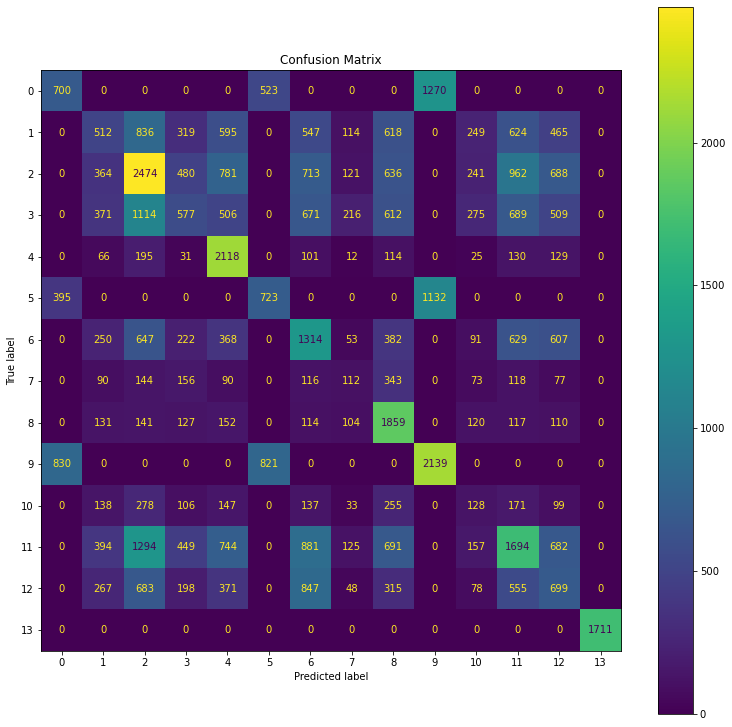

In [23]:
#Creating confusion matrix
cm = confusion_matrix(y_test, CBC_test_pred);
cmp = ConfusionMatrixDisplay(cm);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

### Crime Key ###

**To make our confusion matrix more readable, we represented the crimes as numeric values. Below is a key that matches the numeric value to the crime**

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Identity Theft

5) Intimidation

6) Motor Vehicle Theft

7) Robbery

8) Shoplifting

9) Simple Assault

10) Theft From Building

11) Theft From Motor Vehicle

12) Theft of Motor Vehicle Parts or Accessories

13) Trespass of Real Property 

<a id='classification_report_results3'></a>

### Classification Report Results ###

Let's take a look at our test model classification report results for each crime:

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .36, a recall score of .28, and an f1 score of .32. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 36% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 28% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .20, a recall score of .10, and an f1 score of .14. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 20% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .32, a recall score of .33, and an f1 score of .32. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 32% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 33% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .22, a recall score of .10, and an f1 score of .14. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 22% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .36, a recall score of .73, and an f1 score of .48. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 36% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 73% of them.
* There is an f1 score of .48, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .35, a recall score of .32, and an f1 score of .33. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 35% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 32% of them.
* There is an f1 score of .33, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .24, a recall score of .29, and an f1 score of .26. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 24% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 29% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .12, a recall score of .08, and an f1 score of .10. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 12% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 8% of them.
* There is an f1 score of .10, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .32, a recall score of .62, and an f1 score of .42. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 32% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 62% of them.
* There is an f1 score of .42, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .47, a recall score of .56, and an f1 score of .51. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 47% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 56% of them.
* There is an f1 score of .51, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .09, a recall score of .09, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 9% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 9% of them.
* There is an f1 score of .09, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .30, a recall score of .24, and an f1 score of .26. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 30% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 24% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .17, a recall score of .17, and an f1 score of .17. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 17% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 17% of them.
* There is an f1 score of .17, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

<a id='confusion_matrix_results3'></a>

###  Confusion Matrix Results ###

Let's take a look at our test model confusion matrix results for each crime:

**0) Aggravated Assault**

* 700 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,793 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 1,225 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,252 crimes were correctly predicted as not being "Aggravated Assault" crimes

We can see: 

* We have high instances of true positives, meaning our model is classifying a large amount of crimes correctly as being Aggravated Assault crimes


* We have high instances of false negatives. This means that wrong police action could be taken, and that the wrong amount of police officers are sent to that crime. It could also mean that someone gets charged for the wrong crime. Someone who did commit an Aggravated assault crime, could now get charged for a different crime, and receive a higher or lower sentence than they deserve, both of which are not ideal


* We have high instances of false positives. Again, this could mean that wrong police action is taken, and the wrong amount of police officers are sent to that crime. Additionally, this could mean that someone who did not commit an Aggravated Assault crime, will get sentenced wrongly. They'll either receive a higher or lower sentence than they deserve, which is not ideal


* Lastly, we have a high number of instances for true negatives. While it's good to have high instances of true negatives, it could also mean that other crimes are being mispredicted/misclassified. Therefore, we'll focus more on the other instances

**1) All Other Larceny**

* 512 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,367 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 2,071 crimes were wrongly predicted as being "All Other Larceny" crimes
* 44,863 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 2,474 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 4,986 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 5,332 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 40,973 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 577 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 4,963 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 2,088 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 47,221 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 2,118 crimes were correctly predicted as being "Identity Theft" crimes
* 803 crimes were wrongly predicted as not being "Identity Theft" crimes
* 3,754 crimes were wrongly predicted as being "Identity Theft" crimes
* 48,064 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 723 crimes were correctly predicted as being "Intimidation" crimes
* 1,527 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,344 crimes were wrongly predicted as being "Intimidation" crimes
* 49,889 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 1,314 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 3,249 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 4,127 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 47,531 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 112 crimes were correctly predicted as being "Robbery" crimes
* 1,207 crimes were wrongly predicted as not being "Robbery" crimes
* 826 crimes were wrongly predicted as being "Robbery" crimes
* 51,532 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting**

* 1,859 crimes were correctly predicted as being "Shoplifting" crimes
* 1,116 crimes were wrongly predicted as not being "Shoplifting" crimes
* 3,966 crimes were wrongly predicted as being "Shoplifting" crimes
* 49,098 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 2,139 crimes were correctly predicted as being "Simple Assault" crimes
* 1,651 crimes were wrongly predicted as not being "Simple Assault" crimes
* 3,409 crimes were wrongly predicted as being "Simple Assault" crimes
* 50,423 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 128 crimes were correctly predicted as being "Theft From Building" crimes
* 1,364 crimes were wrongly predicted as not being "Theft From Building" crimes
* 1,309 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,929 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 1,694 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 7,111 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 3,995 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 49,631 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 699 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,362 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,366 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,863 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

<a id='interpreting_results3'></a>

## Interpreting Results ##

We want to look at various aspects of our classification report and confusion matrix  for our new initial model. Again, we want to look at recall (classification report), as well as the number of true positives, false negatives, false positives, and true negatives (for our confusion matrix). So let's take a look at our results:

 **Classification Report Results**
* We seem to have have some overfitting again, as evident when we look at the perfect precision, recall and F1 scores of Trespass of Real Property crimes, as well as our training classification report results being better than our testing results. This is slightly unexpected as we attempted to use CatBoost's resilience to overfitting and early stopping rounds to account for overfitting. We'll talk about implications later on in our final conclusion.


* Our recall values are still low, but have improved from our previous best Random Forest model recall values. Most notable is our Simple Assault crimes with an improvement of .35, Theft From Motor Vehicle crimes with an improvement of .24, and Motor Vehicle Theft crimes with an improvement of .22.  Our highest recall value belonged to Identity Theft crimes again with a .73 value, followed by Shoplifting crimes with a .62 value, then Simple Assault crimes with a .56 value.   


* Our precision scores while staying low (below .47) have increased when compared to our best Random Forest model. Most notable is our Destruction/Damage/Vandalism of Property crimes with an improvement of .22, All Other Larceny crimes with an improvement of .20, and Shoplifting crimes with an improvement of .19. Our highest precision scores belong to Simple Assault crimes with a score of .47, then both Aggravated Assault crimes and Identity Theft crimes with a score of .36.


* Lastly, we saw increases in most F1 scores when compared to our best Random Forest model, with the exception of Aggravated Assault crimes (decreasse of .09). Our highest F1 score (excluding Trespass of Real Property crimes due to overfitting) belonged to Simple Assault crimes, with a score of .51, followed by Identity Theft crimes with a score of .48, then Shoplifting crimes with a score of .42.


**Confusion Matrix Results**
* For our instances of true positives, the most instances belonged to Burglary/Breaking & Entering crimes (2,474) , then Simple Assault crimes (2,139), then Identity Theft crimes (2,118). The least instances belonged to Robbery crimes (112), Theft From Building crimes (128), and All Other Larceny crimes (512).


* For our instances of false negatives, the most instances belonged to Theft From Motor Vehicle crimes (7,111), then Burglary/Breaking & Entering crimes (4,986), then Destruction/Damage/Vandalism of Property crimes (4,963). The least instances belonged to Trespass of Real Property crimes (0), Identity Theft crimes (803), and Shoplifting crimes (1,116).


* For our instances of false positives, the most instances belonged to Burglary/Breaking & Entering crimes (5,332), then Motor Vehicle Theft crimes (4,127), then Theft From Motor Vehicle crimes(3,995). The least instances belonged to Trespass of Real Property crimes (0), Robbery crimes (826), and Theft From Building crimes (1,309). 


* Lastly, for our instances of true negatives, the most instances belonged to Theft From Building crimes (51,929), then Theft of Motor Vehicle Parts or Accessories crimes (51,863), then Robbery crimes (51,679). The least instances belonged to  Burglary/Breaking & Entering crimes (40,973), All Other Larceny crimes (44,863), and Destruction/Damage/Vandalism of Property crimes (47,221).

**From our results we can see that our CatBoost model is overfitting. While still on the low side, we saw improvements in our precision, recall and F1 scores compared to our random forest best model. For our confusion matrix, we saw various shifts (compared to our best Random Forest model) in regards to which crimes had the most instances of false positives/negatives, etc. Our model seems to best predict new crimes as Simple Assault and shoplifting crimes (in regards to overall precision/recall/F1 values, and our true positive values/false negative values). Next, we'll use Grid-search in an attempt to tune our CatBoost model. We'll see if we can do anything about the overfitting, and see if our model predicts any other type of crimes.**

<a id='catboost2'></a>

# Tuned CatBoost  Model #

Let's attempt to tune our CatBoost model, via Grid-search. We'll attempt to reduce the overfitting occuring, and we'll also see if using a grid search to find our optimal criteria will help modify our classification report values. Lastly, we'll train the model on the GPU to speed up training time.

**Let's create our Grid-search with our various parameters**

In [24]:
#Grid-search params
params = {'learning_rate': [0.05, 0.1, 0.5],
          'loss_function': ['MultiClass'],
          'task_type': ['GPU'],
          'random_state' : [1],
          'depth': [2, 4, 6],
          'iterations': [100, 500, 1000],
         }

In [25]:
CBC_gs = GridSearchCV(CBC, params)
CBC_gs.fit(X_train, y_train, early_stopping_rounds=5, plot = True)
CBC_gs.best_params_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'depth': 6,
 'iterations': 1000,
 'learning_rate': 0.5,
 'loss_function': 'MultiClass',
 'random_state': 1,
 'task_type': 'GPU'}

**Next, let's create our new model with the Grid-search best parameters**

In [26]:
#Training on GPU
CBC2 = CatBoostClassifier(
    random_state = 1,
    task_type = 'GPU',
    loss_function = 'MultiClass',
    learning_rate=0.5,
    depth = 6,
    iterations = 1000,
    logging_level = "Silent"
)

In [27]:
CBC2.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [28]:
CBC_train_pred2 = CBC2.predict(X_train)
CBC_test_pred2 = CBC2.predict(X_test)

<a id='classification_report4'></a>

### Classification Report ###

**Printing our training results**

In [29]:
print(classification_report(y_train, CBC_train_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.66      0.65      0.65     22703
                          All Other Larceny       0.36      0.22      0.28     22703
               Burglary/Breaking & Entering       0.36      0.39      0.37     22703
   Destruction/Damage/Vandalism of Property       0.36      0.24      0.29     22703
                             Identity Theft       0.58      0.79      0.67     22703
                               Intimidation       0.67      0.68      0.67     22703
                        Motor Vehicle Theft       0.39      0.34      0.37     22703
                                    Robbery       0.57      0.62      0.59     22703
                                Shoplifting       0.51      0.71      0.59     22703
                             Simple Assault       0.63      0.64      0.64     22703
                        Theft From Building       0.54      0.58

**Printing our testing results**

In [30]:
print(classification_report(y_test, CBC_test_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.35      0.30      0.32      2493
                          All Other Larceny       0.19      0.12      0.15      4879
               Burglary/Breaking & Entering       0.31      0.32      0.31      7460
   Destruction/Damage/Vandalism of Property       0.21      0.14      0.17      5540
                             Identity Theft       0.38      0.68      0.49      2921
                               Intimidation       0.32      0.29      0.31      2250
                        Motor Vehicle Theft       0.22      0.24      0.23      4563
                                    Robbery       0.11      0.08      0.09      1319
                                Shoplifting       0.34      0.61      0.44      2975
                             Simple Assault       0.46      0.52      0.49      3790
                        Theft From Building       0.07      0.06

<a id='confusion_matrix4'></a>

### Confusion Matrix ###

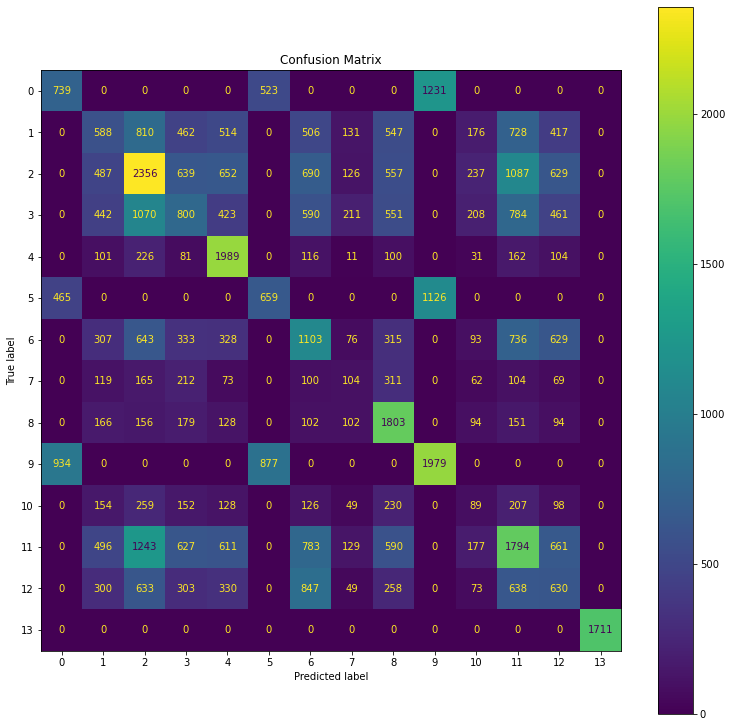

In [31]:
#Create confusion matrix
cm2 = confusion_matrix(y_test, CBC_test_pred2);
cmp2 = ConfusionMatrixDisplay(cm2);
fig, ax = plt.subplots(figsize=(13,13));
cmp2.plot(ax=ax);
cmp2.ax_.set_title("Confusion Matrix");

<a id='classification_report_results4'></a>

### Classification Report Results ###

Let's take a look at our classification report test results for each crime:

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .35, a recall score of .30, and an f1 score of .32. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 35% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 30% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .19, a recall score of .12, and an f1 score of .15. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 19% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 12% of them.
* There is an f1 score of .15, indicating poor performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .31, a recall score of .32, and an f1 score of .31. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 31% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 32% of them.
* There is an f1 score of .31, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .21, a recall score of .14, and an f1 score of .17. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 21% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 14% of them.
* There is an f1 score of .17, indicating poor performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .38, a recall score of .68, and an f1 score of .49. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 38% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 68% of them.
* There is an f1 score of .49, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .32, a recall score of .29, and an f1 score of .31. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 32% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 29% of them.
* There is an f1 score of .31, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .22, a recall score of .24, and an f1 score of .23. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 22% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 24% of them.
* There is an f1 score of .23, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .11, a recall score of .08, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 11% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 8% of them.
* There is an f1 score of .09, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .34, a recall score of .61, and an f1 score of .44. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 34% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 61% of them.
* There is an f1 score of .44, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .46, a recall score of .52, and an f1 score of .49. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 46% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 52% of them.
* There is an f1 score of .49, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .07, a recall score of .06, and an f1 score of .07. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 7% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 6% of them.
* There is an f1 score of .07, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .28, a recall score of .25, and an f1 score of .27. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 28% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 25% of them.
* There is an f1 score of .27, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .17, a recall score of .16, and an f1 score of .16. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 17% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 16% of them.
* There is an f1 score of .16, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

<a id='confusion_matrix_results4'></a>

### Confusion Matrix Results ###

**0) Aggravated Assault**

* 739 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,754 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 1,399 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,673 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 588 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,291 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 2,572 crimes were wrongly predicted as being "All Other Larceny" crimes
* 45,114 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 2,356 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 5,104 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 5,205 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 42,440 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 800 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 4,740 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 2,988 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 46,650 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 1,989 crimes were correctly predicted as being "Identity Theft" crimes
* 932 crimes were wrongly predicted as not being "Identity Theft" crimes
* 3,187 crimes were wrongly predicted as being "Identity Theft" crimes
* 48,454 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 659 crimes were correctly predicted as being "Intimidation" crimes
* 1,591 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,400 crimes were wrongly predicted as being "Intimidation" crimes
* 49,903 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 1,103 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 3,460 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 3,860 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 47,655 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 104 crimes were correctly predicted as being "Robbery" crimes
* 1,215 crimes were wrongly predicted as not being "Robbery" crimes
* 884 crimes were wrongly predicted as being "Robbery" crimes
* 51,586 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting*** 

* 1,803 crimes were correctly predicted as being "Shoplifting" crimes
* 1,172 crimes were wrongly predicted as not being "Shoplifting" crimes
* 3,516 crimes were wrongly predicted as being "Shoplifting" crimes
* 47,366 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 1,979 crimes were correctly predicted as being "Simple Assault" crimes
* 1,811 crimes were wrongly predicted as not being "Simple Assault" crimes
* 2,357 crimes were wrongly predicted as being "Simple Assault" crimes
* 50,583 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 89 crimes were correctly predicted as being "Theft From Building" crimes
* 1,403 crimes were wrongly predicted as not being "Theft From Building" crimes
* 1,151 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,918 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 1,794 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 5,317 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 4,597 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 49,469 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 630 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,431 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,162 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,932 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

<a id='interpreting_results4'></a>

## Interpreting Results ##

We want to look at various aspects of our classification report and confusion matrix  for our Grid-search tuned model. Again, we want to look at recall (classification report), as well as the number of true positives, false negatives, false positives, and true negatives (for our confusion matrix). So let's take a look at our results:

 **Classification Report Results**
* Interestingly, we seem to still have some overfitting occuring, despite our grid search and early stopping rounds. We can see this when we look at the perfect precision, recall and F1 scores of Trespass of Real Property crimes, and again in our training classification report results being better than our testing results. We'll talk about implications and possible solutions later on in our final conclusion.


* Our recall values are still low, but we did see even more improvement from our initial CatBoost model for some of our crimes like Destruction/Damage/Vandalism of Property (.04), Aggravated Assault (.02 improvement), All Other Larceny (.02 improvement). However, some crimes also saw a decrease in recall value like Identity Theft (.05 decrease), Motor Vehicle Theft (.05 decrease), and Simple Assault (.04 decrease). Our highest recall value belonged to Identity Theft crimes again with a .68 value, followed by Shoplifting crimes with a .61 value, then Simple Assault crimes with a .52 value.   


* Our precision scores stayed low (below .46), and many of our precision scores decreased when compared to our initial CatBoost model. Most notably were Initimdation crimes (.03 decrease), Motor Vehicle Theft (.02 decrease), and Theft From Building (.02 decrease). However, we did see some improvements in recall score with Identity Theft (.02 improvement), and Shoplifting (.02 improvement).  Our highest precision scores belong to Simple Assault crimes with a score of .46, then Identity Theft crimes with a score of .38, then Aggravated Assault crimes with a score of .35.


* Lastly, we saw a mixture of increases and decreases in our F1 scores when compared to our initial CatBoost model. We saw increases in our recall scores when it came to crimes like Destruction/Damage/Vandalism of Property (.03 improvement), Intimidation (.02 improvement), and Shoplifting (.02 improvement). We saw decreases in crimes like Motor Vehicle Theft (.03 decrease), Intimidation (.02 decrease), and Simple Assault (.02). Our highest F1 score (excluding Trespass of Real Property crimes due to overfitting) was a tie between Simple Assault crimes and Identity Theft crimes with a score of .49, followed by Shoplifting crimes with a score of .44


**Confusion Matrix Results**
* For our instances of true positives, the most instances belonged to Burglary/Breaking & Entering crimes (2,356) , then Identity Theft crimes (1,989), then Simple Assault crimes (1,979). The least instances belonged to Theft From Building crimes (89), Robbery crimes (104) and All Other Larceny crimes (588).


* For our instances of false negatives, the most instances belonged to Theft From Motor Vehicle crimes (5,317), then Burglary/Breaking & Entering crimes (5,104), then Destruction/Damage/Vandalism of Property crimes (4,740 ). The least instances belonged to Trespass of Real Property crimes (0), Identity Theft crimes (932), and Shoplifting crimes (1,172).


* For our instances of false positives, the most instances belonged to Burglary/Breaking & Entering crimes (5,205 ), then Theft From Motor Vehicle crimes (4,597), then Motor Vehicle Theft crimes (3,860). The least instances belonged to Trespass of Real Property crimes (0), Robbery crimes (884), and Theft From Building crimes (1,151). 


* Lastly, for our instances of true negatives, the most instances belonged to Theft of Motor Vehicle Parts or Accessories crimes (51,932),then Theft From Building crimes (51,918), then  then Robbery crimes (51,586). The least instances belonged to  Burglary/Breaking & Entering crimes (42,440), All Other Larceny crimes (44,863), and Destruction/Damage/Vandalism of Property crimes (46,650).

**From our results we can see that our tuned CatBoost model is overfitting, despite our precautions taken. Our precision, recall and F1 scores were still on the low side, and we didn't actually see that much improvement overall. Our tuned model seems to best predict new crimes as Simple Assault and Identity Theft crimes (in regards to overall precision/recall/F1 values, and our true positive values/false negative values). crime. Due to our initial model having better classification report values and higher instances of true positives, we'll say that the initial CatBoost model is the "best model" when compared to not only the tuned CatBoost model, but also the Random Forest models. Next, we'll move on to predicting location of a new crime, and this time will only use a Catboost algorithm.**

<a id='crime_location'></a>

# 2) Crime Location #

We'll also be looking at the location of crimes. Seattle has 5 precincts, or police station areas. They are: North, East, South, West and Southwest. Then, there are smaller geographical areas within the precincts called sectors. Finally, each sector is divided into 3 smaller sections called beats, which individual patrol officers are assigned responsibility for. We'll be looking at which beats crimes occur in, since beats are the smallest area we can look at. To give a better idea of what we're talking about, we provided an interactive Seattle map below. The user can zoom in on this map, which shows precincts, beats, and even neighborhoods (MCPP) in Seattle. Keep in mind, that while looking at the notebook on Github, the interactive map may not show up, and the user may have to actually go to the physical notebook. We'll also provide a visual map for beats later on in the notebook.

In [32]:
url = 'https://seattlecitygis.maps.arcgis.com/apps/instant/lookup/index.html?appid=cf1b0198a1b94db5a8152c9f93232fa5'

In [33]:
IFrame(url, width='100%', height=500)

**In our preprocessing notebook, we created another df specifically preproccessed to set up "beat" as the target variable. Let's open it:**

In [34]:
df_beat = pd.read_csv("seattle_crime_beat.csv")

**Displaying our df**

In [35]:
df_beat

,Crime Against Category,Offense,Sector,Beat,MCPP,Time,Day,Year
0,2,44,22,U3,50,1753,6,0
1,3,13,5,B2,4,77,2,0
2,3,13,13,L2,43,1609,1,0
3,2,9,8,E1,8,1715,1,0
4,2,46,22,U2,58,1288,1,0
...,...,...,...,...,...,...,...,...
104622,2,33,24,W2,1,191,5,3
104623,2,33,13,L2,43,1902,1,3
104624,2,33,5,B1,4,1339,4,2
104625,2,50,12,K3,11,39,3,2


**Creating our target variable**

In [36]:
X_location = df_beat.drop("Beat", axis = 1)

#Target Variable
y_location = df_beat["Beat"]

**Performing our train-test split**

In [37]:
X_location_train, X_location_test, y_location_train, y_location_test = train_test_split(X_location, y_location, random_state = 1)

**Scaling our data**

In [38]:
SS = StandardScaler()
X_location_train = SS.fit_transform(X_location_train)
X_location_test = SS.transform(X_location_test)

**Let's check our df for any data imbalances**

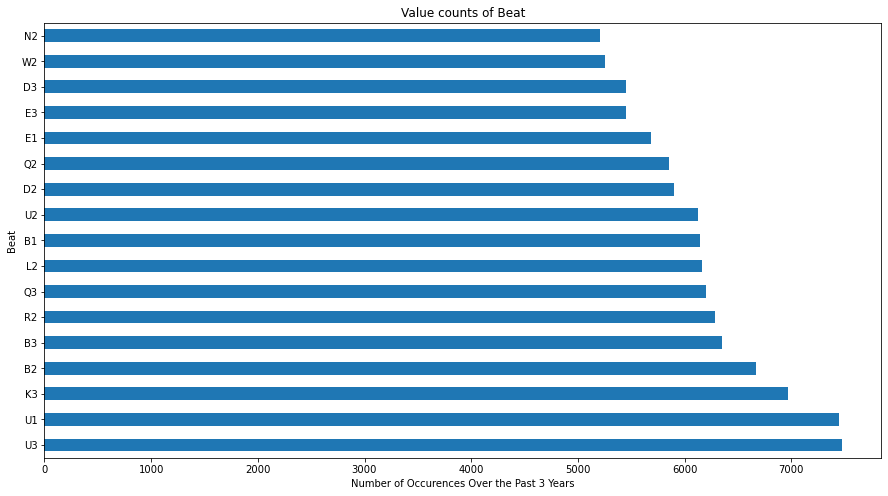

In [39]:
#Creating bar graph
ax = df_beat.value_counts('Beat').plot.barh(figsize = (15,8), title = "Value counts of Beat");
ax.set_xlabel("Number of Occurences Over the Past 3 Years");

**We see a slight imbalance, so we'll use SMOTE to address that**

In [40]:
sm = SMOTE(random_state = 1)
X_location_train, y_location_train = sm.fit_sample(X_location_train, y_location_train)

**Now that we've set up our data, let's start creating our initial model. We'll only be using a CatBoost model, (for both our initial model and tuned model) since it's best suited for categorical variable heavy data, and also to conserve runtime.**

<a id='catboost3'></a>

## CatBoost Model ##

We'll be using CatBoost again for our model. We'l start off with a basic default model, but implement early stopping rounds to see if we can reduce overfitting from the start.

**Creating initial model**

In [41]:
CBC_beat = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
    logging_level = "Silent"
)

In [42]:
CBC_beat.fit(
    X_location_train, y_location_train,
    early_stopping_rounds=5,
    plot = True
)

CBC_location_train_pred = CBC_beat.predict(X_location_train)
CBC_location_test_pred = CBC_beat.predict(X_location_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

### Beat Map ###

Below, a non-interactive Beat map is given to provide reference to where each beat in our classification report and confusion matrix is.

In [43]:
Image(url= "https://www.seattle.gov/images/Departments/Police/aboutUs/precinctmap.png",width=450, height=450)

<a id='classification_report5'></a>

### Classification Report ###

<a id='results_cell2'></a>

**Printing our training results**

In [44]:
print(classification_report(y_location_train, CBC_location_train_pred))

              precision    recall  f1-score   support

          B1       0.73      0.98      0.84      5638
          B2       0.74      0.63      0.68      5638
          B3       0.99      0.80      0.88      5638
          D2       0.82      0.74      0.78      5638
          D3       0.76      0.84      0.80      5638
          E1       0.80      1.00      0.89      5638
          E3       1.00      0.75      0.86      5638
          K3       1.00      1.00      1.00      5638
          L2       1.00      1.00      1.00      5638
          N2       1.00      1.00      1.00      5638
          Q2       0.69      0.77      0.72      5638
          Q3       0.74      0.65      0.69      5638
          R2       1.00      1.00      1.00      5638
          U1       0.68      0.54      0.60      5638
          U2       0.71      0.95      0.81      5638
          U3       0.90      0.78      0.84      5638
          W2       1.00      1.00      1.00      5638

    accuracy              

**Printing our testing results**

In [45]:
print(classification_report(y_location_test, CBC_location_test_pred))

              precision    recall  f1-score   support

          B1       0.68      0.95      0.80      1523
          B2       0.68      0.58      0.63      1686
          B3       0.96      0.75      0.84      1586
          D2       0.76      0.66      0.71      1435
          D3       0.68      0.77      0.72      1311
          E1       0.78      0.99      0.87      1415
          E3       0.99      0.71      0.83      1401
          K3       1.00      1.00      1.00      1748
          L2       1.00      1.00      1.00      1604
          N2       1.00      1.00      1.00      1282
          Q2       0.62      0.70      0.66      1497
          Q3       0.66      0.57      0.61      1522
          R2       1.00      1.00      1.00      1601
          U1       0.58      0.48      0.52      1813
          U2       0.63      0.90      0.75      1543
          U3       0.89      0.74      0.81      1911
          W2       1.00      1.00      1.00      1279

    accuracy              

<a id='confusion_matrix5'></a>

### Confusion Matrix ###

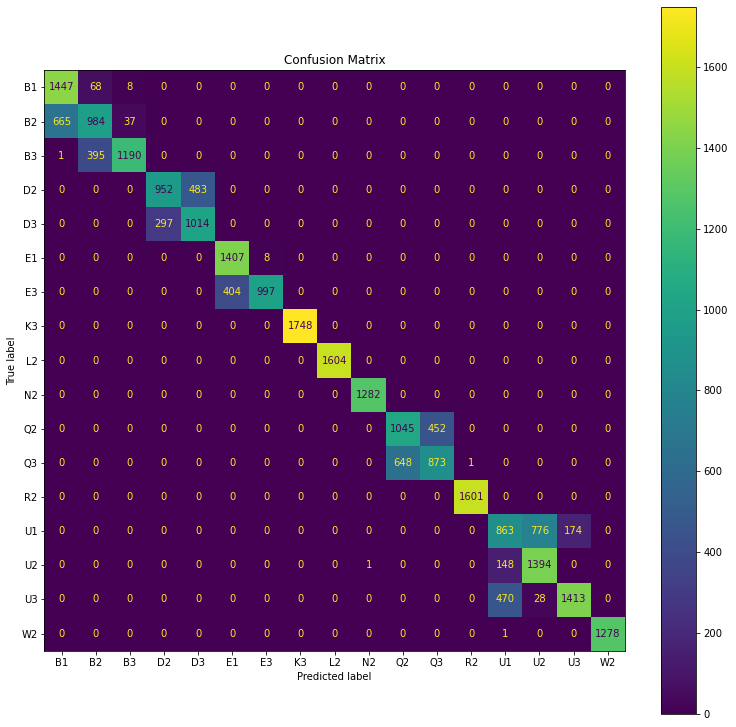

In [46]:
#Create confusion matrix
cm = confusion_matrix(y_location_test, CBC_location_test_pred);
cmp = ConfusionMatrixDisplay(cm, display_labels = CBC_beat.classes_);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

<a id='classification_report_results5'></a>

### Classification Report Results ###

Let's take a look at our classification report test results for each beat:

**B1**

For our B1 results, we have a precision score of .68, a recall score of .95, and an f1 score of .80. This means that:


* Out of all the crime locations that the model predicted would be in the B1 beat, 68% were actually in the B1 beat.
* Out of all the crime locations that were in the B1 beat, the model correctly predicted 95% of them.
* There is an f1 score of .80, indicating high performance on predicting probability of the crime being in the B1 beat.

**B2**

For our B2 results, we have a precision score of .68, a recall score of .58, and an f1 score of .63. This means that:


* Out of all the crime locations that the model predicted would be in the B2 beat, 68% were actually in the B2 beat.
* Out of all the crime locations that were in the B2 beat, the model correctly predicted 58% of them.
* There is an f1 score of .63, indicating lower performance on predicting probability of the crime being in the B2 beat.

**B3**

For our B3 results, we have a precision score of .96, a recall score of .75, and an f1 score of .84. This means that:


* Out of all the crime locations that the model predicted would be in the B3 beat, 96% were actually in the B3 beat.
* Out of all the crime locations that were in the B3 beat, the model correctly predicted 75% of them.
* There is an f1 score of .84, indicating high performance on predicting probability of the crime being in the B3 beat.

**D2**

For our D2 results, we have a precision score of .76, a recall score of .66, and an f1 score of .71. This means that:


* Out of all the crime locations that the model predicted would be in the D2 beat, 76% were actually in the D2 beat.
* Out of all the crime locations that were in the D2 beat, the model correctly predicted 66% of them.
* There is an f1 score of .71, indicating lower performance on predicting probability of the crime being in the D2 beat.

**D3**

For our D3 results, we have a precision score of .68, a recall score of .77, and an f1 score of .72. This means that:


* Out of all the crime locations that the model predicted would be in the D3 beat, 68% were actually in the D3 beat.
* Out of all the crime locations that were in the D3 beat, the model correctly predicted 77% of them.
* There is an f1 score of .72, indicating lower performance on predicting probability of the crime being in the D3 beat.

**E1**

For our E1 results, we have a precision score of .78, a recall score of .99, and an f1 score of .87. This means that:


* Out of all the crime locations that the model predicted would be in the E1 beat, 78% were actually in the E1 beat.
* Out of all the crime locations that were in the E1 beat, the model correctly predicted 99% of them.
* There is an f1 score of .87, indicating high performance on predicting probability of the crime being in the E1 beat.

**E3**

For our E3 results, we have a precision score of .99, a recall score of .71, and an f1 score of .83. This means that:


* Out of all the crime locations that the model predicted would be in the E3 beat, 99% were actually in the E3 beat.
* Out of all the crime locations that were in the E3 beat, the model correctly predicted 71% of them.
* There is an f1 score of .83, indicating high performance on predicting probability of the crime being in the E3 beat.

**K3**

For our K3 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the K3 beat, 100% were actually in the K3 beat.
* Out of all the crime locations that were in the K3 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest performance possible on predicting probability of the crime being in the K3 beat.

**L2**

For our L2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the L2 beat, 100% were actually in the L2 beat.
* Out of all the crime locations that were in the L2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest performance possible" on predicting probability of the crime being in the L2 beat.

**N2**

For our N2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the N2 beat, 100% were actually in the N2 beat.
* Out of all the crime locations that were in the N2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest possible performance on predicting probability of the crime being in the N2 beat.

**Q2**

For our Q2 results, we have a precision score of .62, a recall score of .70, and an f1 score of .66. This means that:


* Out of all the crime locations that the model predicted would be in the Q2 beat, 62% were actually in the Q2 beat.
* Out of all the crime locations that were in the Q2 beat, the model correctly predicted 70% of them.
* There is an f1 score of .66, indicating lower performance on predicting probability of the crime being in the Q2 beat.

**Q3**

For our Q3 results, we have a precision score of .66, a recall score of .57, and an f1 score of .61. This means that:


* Out of all the crime locations that the model predicted would be in the Q3 beat, 66% were actually in the Q3 beat.
* Out of all the crime locations that were in the Q3 beat, the model correctly predicted 57% of them.
* There is an f1 score of .61, indicating lower performance on predicting probability of the crime being in the Q3 beat.

**R2**

For our R2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the R2 beat, 100% were actually in the R2 beat.
* Out of all the crime locations that were in the R2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest possible performance on predicting probability of the crime being in the R2 beat.

**U1**

For our U1 results, we have a precision score of .58, a recall score of .48, and an f1 score of .52. This means that:


* Out of all the crime locations that the model predicted would be in the U1 beat, 58% were actually in the U1 beat.
* Out of all the crime locations that were in the U1 beat, the model correctly predicted 48% of them.
* There is an f1 score of .52, indicating low performance on predicting probability of the crime being in the U1 beat.

**U2**

For our U2 results, we have a precision score of .63, a recall score of .90, and an f1 score of .75. This means that:


* Out of all the crime locations that the model predicted would be in the U2 beat, 63% were actually in the U2 beat.
* Out of all the crime locations that were in the U2 beat, the model correctly predicted 90% of them.
* There is an f1 score of .75, indicating lower performance on predicting probability of the crime being in the U2 beat.

**U3**

For our U3 results, we have a precision score of .89, a recall score of .74, and an f1 score of .81. This means that:


* Out of all the crime locations that the model predicted would be in the U3 beat, 89% were actually in the U3 beat.
* Out of all the crime locations that were in the U3 beat, the model correctly predicted 74% of them.
* There is an f1 score of .81, indicating high performance on predicting probability of the crime being in the U3 beat.

**W2**

For our W2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the W2 beat, 100% were actually in the W2 beat.
* Out of all the crime locations that were in the W2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest possible performance on predicting probability of the crime being in the W2 beat.

<a id='confusion_matrix_results5'></a>

### Confusion Matrix Results ###

Let's take a look at our test model classification report results:

**B1**

* 1,447 crime locations were correctly predicted as being in the B1 beat.
* 76 crime locations were wrongly predicted as not being in the B1 beat.
* 665 crime locations were wrongly predicted as being in the B1 beat.
* 22,765 crime locations were correctly predicted as not being in the B1 beat.

**B2**

* 984 crime locations were correctly predicted as being in the B2 beat.
* 702 crime locations were wrongly predicted as not being in the B2 beat.
* 463 crime locations were wrongly predicted as being in the B2 beat.
* 24,733 crime locations were correctly predicted as not being in the B2 beat.

**B3**

* 1,190 crime locations were correctly predicted as being in the B3 beat.
* 396 crime locations were wrongly predicted as not being in the B3 beat.
* 45 crime locations were wrongly predicted as being in the B3 beat.
* 24,967 crime locations were correctly predicted as not being in the B3 beat.

**D2**

* 952 crime locations were correctly predicted as being in the D2 beat.
* 483 crime locations were wrongly predicted as not being in the D2 beat.
* 297 crime locations were wrongly predicted as being in the D2 beat.
* 24,425 crime locations were correctly predicted as not being in the D2 beat.

**D3**

* 1,014 crime locations were correctly predicted as being in the D3 beat.
* 297 crime locations were wrongly predicted as not being in the D3 beat.
* 483 crime locations were wrongly predicted as being in the D3 beat.
* 25,143 crime locations were correctly predicted as not being in the D3 beat.

**E1**

* 1,407 crime locations were correctly predicted as being in the E1 beat.
* 8 crime locations were wrongly predicted as not being in the E1 beat.
* 404 crime locations were wrongly predicted as being in the E1 beat.
* 24,388 crime locations were correctly predicted as not being in the E1 beat.

**E3**

* 997 crime locations were correctly predicted as being in the E3 beat.
* 404 crime locations were wrongly predicted as not being in the E3 beat.
* 8 crime locations were wrongly predicted as being in the E3 beat.
* 25,160 crime locations were correctly predicted as not being in the E3 beat.

**K3**

* 1,748 crime locations were correctly predicted as being in the K3 beat.
* 0 crime locations were wrongly predicted as not being in the K3 beat.
* 0 crime locations were wrongly predicted as being in the K3 beat.
* 24,409 crime locations were correctly predicted as not being in the K3 beat.

**L2**

* 1,604 crime locations were correctly predicted as being in the L2 beat.
* 0 crime locations were wrongly predicted as not being in the L2 beat.
* 0 crime locations were wrongly predicted as being in the L2 beat.
* 26,154 crime locations were correctly predicted as not being in the L2 beat.

**N2**

* 1,282 crime locations were correctly predicted as being in the N2 beat.
* 0 crime locations were wrongly predicted as not being in the N2 beat.
* 1 crime locations were wrongly predicted as being in the N2 beat.
* 24,874 crime locations were correctly predicted as not being in the N2 beat.

**Q2**

* 1,045 crime locations were correctly predicted as being in the Q2 beat.
* 452 crime locations were wrongly predicted as not being in the Q2 beat.
* 648 crime locations were wrongly predicted as being in the Q2 beat.
* 24,012 crime locations were correctly not predicted as being in the Q2 beat.

**Q3**

* 873 crime locations were correctly predicted as being in the Q3 beat.
* 649 crime locations were wrongly predicted as not being in the Q3 beat.
* 452 crime locations were wrongly predicted as being in the Q3 beat.
* 25,283 crime locations were correctly predicted as not being in the Q3 beat.

**R2**

* 1,601 crime locations were correctly predicted as being in the R2 beat.
* 0 crime locations were wrongly predicted as not being in the R2 beat.
* 1 crime locations were wrongly predicted as being in the R2 beat.
* 24,556 crime locations were correctly predicted as not being in the R2 beat.

**U1**

* 863 crime locations were correctly predicted as being in the U1 beat.
* 950 crime locations were wrongly predicted as not being in the U1 beat.
* 619 crime locations were wrongly predicted as being in the U1 beat.
* 23,725 crime locations were correctly predicted as not being in the U1 beat.

**U2**

* 1,394 crime locations were correctly predicted as being in the U2 beat.
* 149 crime locations were wrongly predicted as not being in the U2 beat.
* 804 crime locations were wrongly predicted as being in the U2 beat.
* 24,734 crime locations were correctly predicted as not being in the U2 beat.

**U3**

* 1,413 crime locations were correctly predicted as being in the U3 beat.
* 498 crime locations were wrongly predicted as not being in the U3 beat.
* 174 crime locations were wrongly predicted as being in the U3 beat.
* 22,743 crime locations were correctly predicted as not being in the U3 beat.

**W2**

* 1,278 crime locations were correctly predicted as being in the W2 beat.
* 1 crime locations were wrongly predicted as not being in the W2 beat.
* 0 crime locations were wrongly predicted as being in the W2 beat.
* 23,335 crime locations were correctly predicted as not being in the W2 beat.

<a id='interpreting_results5'></a>

## Interpreting Results ##

We want to look at various aspects of our classification report and confusion matrix in regards to the location a crime is committed. In particular (for our classification report) we want to look at recall, since that will give us the most realistic look at how our model performs. Recall in this case asks the question of "Out of the actual total number of a certain crime location, how many locations did our model accurately classify/predict to be that location?". We'll also take a look at the number of true positives, false negatives, false positives, and true negatives (for our confusion matrix). So let's take a look at our results:

 **Classification Report Results**
* Again, despite our early stopping rounds and use of the CatBoost algorithm, we see alot of overfitting occuring. We can see this when we look at the perfect precision, recall and F1 scores of our K3, L2, R2, N2 and W2 beats. It is also evident in our training classification report results being better than our testing results.  We'll talk about implications and possible solutions later on in our final conclusion.


* Our recall values are much higher than when we looked at type of crime in our previous models. Our highest recall values (apart from our overfitting values) belonged to the E1 beat (.99), the B1 beat (.95), and the U2 beat (.90).  


* Our precision scores are also relatively high, with our lowest recall score being .58 (U1). Our highest precision scores (apart from our overfitting values) belonged to the E3 beat (.99), the B3 beat (.96), and the U3 beat (.89).


* Lastly, our F1 scores are also somewhat high. Apart from our overfitting values, our highest F1 score belonged to the E1 beat (.87), the B3 beat (.84), and the E3 beat (.83).

**Confusion Matrix Results**
* For our instances of true positives, the most instances belonged to the K3 beat (1,748) , then the L2 beat (1,604), then the R2 beat (1,601). The least instances belonged to the U1 beat  (863), the Q3 beat (873), and the D2 beat (952).


* For our instances of false negatives, the most instances belonged to the U1 beat (950) , then the B2 beat (702), then the Q3 beat (649). The least instances was a tie between the K3 beat, L2 beat, R2 beat, and N2 beat all with 0 instances.



* For our instances of false positives, the most instances belonged to the U2 beat (804) , then the B1 beat (665), then the Q2 beat (648). The least instances was a tie between the W2 beat, L2 beat, and the K3 beat, all with 0 instances.


* Lastly, for our instances of true negatives, the most instances belonged to the L2 beat (26,154) , then the Q3 beat (25,283), then the E3 beat (25,160). The least instances belonged to the B1 beat (22,765), then the U3 beat (22,743), and the W2 beat (23,335).


**From our results we can see that our CatBoost model is overfitting, despite our precautions taken. This could explain why our precision, recall and F1 scores are much higher when compared to our crime type model. Our initial model seems to best predict new crime locations as being in the B3, E1, E3, and L2 beats (in regards to overall precision/recall values, and our true positive/negative values as well as false positive/negative values). Let's try using a Grid-search to see if we can somewhat reduce overfitting, and get classification report values that aren't overfitting.**

<a id='catboost4'></a>

## Tuned CatBoost Model ##

Let's attempt to tune our CatBoost model, via Grid-search. We'll use a Grid-search (along with early stopping rounds) to see if we can reduce the overfitting occuring, and to see if finding our optimal criteria will help modify our classification report values.

**Let's create our Grid-search with our various parameters**

In [47]:
#Grid-search params
params = {'learning_rate': [0.05, 0.1, 0.5],
          'loss_function': ['MultiClass'],
          'random_state' : [1],
          'depth': [2, 4, 6],
          'iterations': [100, 500, 1000]
         }

In [48]:
CBC_gs2 = GridSearchCV(CBC_beat, params)
CBC_gs2.fit(X_location_train, y_location_train, early_stopping_rounds=5, plot = True)
CBC_gs2.best_params_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'depth': 6,
 'iterations': 1000,
 'learning_rate': 0.1,
 'loss_function': 'MultiClass',
 'random_state': 1}

**Next, let's create our new model with the Grid-search best parameters**

In [49]:
CBC_beat_tuned = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
    depth = 6,
    learning_rate = 0.1,
    logging_level = "Silent"
)

In [50]:
CBC_beat_tuned.fit(
    X_location_train, y_location_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [51]:
CBC_location_train_pred2 = CBC_beat_tuned.predict(X_location_train)
CBC_location_test_pred2 = CBC_beat_tuned.predict(X_location_test)

**We'll again use the beat map for reference when looking at our classification report and confusion matrix results**

In [52]:
Image(url= "https://www.seattle.gov/images/Departments/Police/aboutUs/precinctmap.png",width=450, height=450)

<a id='classification_report6'></a>

### Classification Report ###

**Printing our training results**

In [53]:
print(classification_report(y_location_train, CBC_location_train_pred2))

              precision    recall  f1-score   support

          B1       0.73      0.98      0.84      5638
          B2       0.74      0.63      0.68      5638
          B3       0.99      0.80      0.88      5638
          D2       0.83      0.74      0.78      5638
          D3       0.76      0.84      0.80      5638
          E1       0.80      1.00      0.89      5638
          E3       1.00      0.75      0.86      5638
          K3       1.00      1.00      1.00      5638
          L2       1.00      1.00      1.00      5638
          N2       1.00      1.00      1.00      5638
          Q2       0.69      0.78      0.73      5638
          Q3       0.74      0.65      0.69      5638
          R2       1.00      1.00      1.00      5638
          U1       0.68      0.54      0.60      5638
          U2       0.71      0.95      0.81      5638
          U3       0.90      0.78      0.84      5638
          W2       1.00      1.00      1.00      5638

    accuracy              

**Printing our testing results**

In [54]:
print(classification_report(y_location_test, CBC_location_test_pred2))

              precision    recall  f1-score   support

          B1       0.68      0.95      0.79      1523
          B2       0.67      0.58      0.62      1686
          B3       0.96      0.75      0.84      1586
          D2       0.76      0.66      0.71      1435
          D3       0.68      0.77      0.72      1311
          E1       0.78      0.99      0.87      1415
          E3       0.99      0.71      0.83      1401
          K3       1.00      1.00      1.00      1748
          L2       1.00      1.00      1.00      1604
          N2       1.00      1.00      1.00      1282
          Q2       0.62      0.71      0.66      1497
          Q3       0.67      0.58      0.62      1522
          R2       1.00      1.00      1.00      1601
          U1       0.58      0.47      0.52      1813
          U2       0.63      0.90      0.75      1543
          U3       0.89      0.74      0.81      1911
          W2       1.00      1.00      1.00      1279

    accuracy              

<a id='confusion_matrix6'></a>

### Confusion Matrix ###

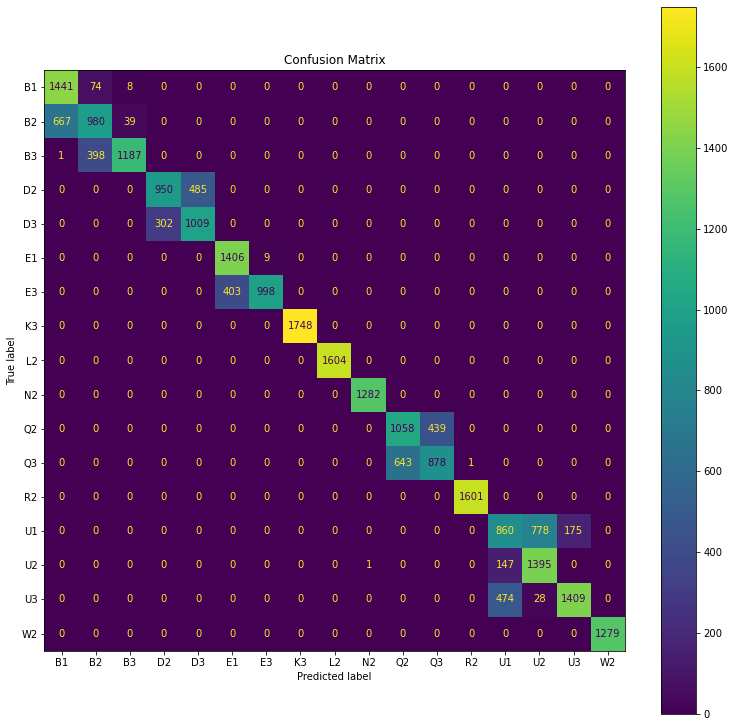

In [55]:
#Create confusion matrix
cm = confusion_matrix(y_location_test, CBC_location_test_pred2);
cmp = ConfusionMatrixDisplay(cm, display_labels = CBC_beat_tuned.classes_);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

<a id='classification_report_results6'></a>

### Classification Report Results ###

Let's take a look at our classification report test results for each beat:

**B1**

For our B1 results, we have a precision score of .68, a recall score of .95, and an f1 score of .79. This means that:


* Out of all the crime locations that the model predicted would be in the B1 beat, 68% were actually in the B1 beat.
* Out of all the crime locations that were in the B1 beat, the model correctly predicted 95% of them.
* There is an f1 score of .79, indicating high performance on predicting probability of the crime being in the B1 beat.

**B2**

For our B2 results, we have a precision score of .67, a recall score of .58, and an f1 score of .62. This means that:


* Out of all the crime locations that the model predicted would be in the B2 beat, 67% were actually in the B2 beat.
* Out of all the crime locations that were in the B2 beat, the model correctly predicted 58% of them.
* There is an f1 score of .62, indicating lower performance on predicting probability of the crime being in the B2 beat.

**B3**

For our B3 results, we have a precision score of .96, a recall score of .75, and an f1 score of .84. This means that:


* Out of all the crime locations that the model predicted would be in the B3 beat, 96% were actually in the B3 beat.
* Out of all the crime locations that were in the B3 beat, the model correctly predicted 75% of them.
* There is an f1 score of .84, indicating high performance on predicting probability of the crime being in the B3 beat.

**D2**

For our D2 results, we have a precision score of .76, a recall score of .66, and an f1 score of .71. This means that:


* Out of all the crime locations that the model predicted would be in the D2 beat, 76% were actually in the D2 beat.
* Out of all the crime locations that were in the D2 beat, the model correctly predicted 66% of them.
* There is an f1 score of .71, indicating lower performance on predicting probability of the crime being in the D2 beat.

**D3**

For our D3 results, we have a precision score of .68, a recall score of .77, and an f1 score of .72. This means that:


* Out of all the crime locations that the model predicted would be in the D3 beat, 68% were actually in the D3 beat.
* Out of all the crime locations that were in the D3 beat, the model correctly predicted 77% of them.
* There is an f1 score of .72, indicating lower performance on predicting probability of the crime being in the D3 beat.

**E1**

For our E1 results, we have a precision score of .78, a recall score of .99, and an f1 score of .87. This means that:


* Out of all the crime locations that the model predicted would be in the E1 beat, 78% were actually in the E1 beat.
* Out of all the crime locations that were in the E1 beat, the model correctly predicted 99% of them.
* There is an f1 score of .87, indicating high performance on predicting probability of the crime being in the E1 beat.

**E3**

For our E3 results, we have a precision score of .99, a recall score of .71, and an f1 score of .83. This means that:


* Out of all the crime locations that the model predicted would be in the E3 beat, 99% were actually in the E3 beat.
* Out of all the crime locations that were in the E3 beat, the model correctly predicted 71% of them.
* There is an f1 score of .83, indicating high performance on predicting probability of the crime being in the E3 beat.

**K3**

For our K3 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the K3 beat, 100% were actually in the K3 beat.
* Out of all the crime locations that were in the K3 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest performance possible on predicting probability of the crime being in the K3 beat.

**L2**

For our L2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the L2 beat, 100% were actually in the L2 beat.
* Out of all the crime locations that were in the L2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest performance possible" on predicting probability of the crime being in the L2 beat.

**N2**

For our N2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the N2 beat, 100% were actually in the N2 beat.
* Out of all the crime locations that were in the N2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest possible performance on predicting probability of the crime being in the N2 beat.

**Q2**

For our Q2 results, we have a precision score of .62, a recall score of .71, and an f1 score of .66. This means that:


* Out of all the crime locations that the model predicted would be in the Q2 beat, 62% were actually in the Q2 beat.
* Out of all the crime locations that were in the Q2 beat, the model correctly predicted 71% of them.
* There is an f1 score of .66, indicating lower performance on predicting probability of the crime being in the Q2 beat.

**Q3**

For our Q3 results, we have a precision score of .67, a recall score of .58, and an f1 score of .62. This means that:


* Out of all the crime locations that the model predicted would be in the Q3 beat, 67% were actually in the Q3 beat.
* Out of all the crime locations that were in the Q3 beat, the model correctly predicted 58% of them.
* There is an f1 score of .62, indicating lower performance on predicting probability of the crime being in the Q3 beat.

**R2**

For our R2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the R2 beat, 100% were actually in the R2 beat.
* Out of all the crime locations that were in the R2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest possible performance on predicting probability of the crime being in the R2 beat.

**U1**

For our U1 results, we have a precision score of .58, a recall score of .47, and an f1 score of .52. This means that:


* Out of all the crime locations that the model predicted would be in the U1 beat, 58% were actually in the U1 beat.
* Out of all the crime locations that were in the U1 beat, the model correctly predicted 47% of them.
* There is an f1 score of .52, indicating low performance on predicting probability of the crime being in the U1 beat.

**U2**

For our U2 results, we have a precision score of .63, a recall score of .90, and an f1 score of .75. This means that:


* Out of all the crime locations that the model predicted would be in the U2 beat, 63% were actually in the U2 beat.
* Out of all the crime locations that were in the U2 beat, the model correctly predicted 90% of them.
* There is an f1 score of .75, indicating lower performance on predicting probability of the crime being in the U2 beat.

**U3**

For our U3 results, we have a precision score of .89, a recall score of .74, and an f1 score of .81. This means that:


* Out of all the crime locations that the model predicted would be in the U3 beat, 89% were actually in the U3 beat.
* Out of all the crime locations that were in the U3 beat, the model correctly predicted 74% of them.
* There is an f1 score of .81, indicating high performance on predicting probability of the crime being in the U3 beat.

**W2**

For our W2 results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:


* Out of all the crime locations that the model predicted would be in the W2 beat, 100% were actually in the W2 beat.
* Out of all the crime locations that were in the W2 beat, the model correctly predicted 100% of them.
* There is an f1 score of 1.0, indicating the highest possible performance on predicting probability of the crime being in the W2 beat.

<a id='confusion_matrix_results6'></a>

### Confusion Matrix Results ###

Let's take a look at our test model classification report results:

**B1**

* 1,441 crime locations were correctly predicted as being in the B1 beat.
* 81 crime locations were wrongly predicted as not being in the B1 beat.
* 68 crime locations were wrongly predicted as being in the B1 beat.
* 23,966 crime locations were correctly predicted as not being in the B1 beat.

**B2**

* 706 crime locations were correctly predicted as being in the B2 beat.
* 702 crime locations were wrongly predicted as not being in the B2 beat.
* 472 crime locations were wrongly predicted as being in the B2 beat.
* 24,731 crime locations were correctly predicted as not being in the B2 beat.

**B3**

* 1,187 crime locations were correctly predicted as being in the B3 beat.
* 399 crime locations were wrongly predicted as not being in the B3 beat.
* 47 crime locations were wrongly predicted as being in the B3 beat.
* 24,961 crime locations were correctly predicted as not being in the B3 beat.

**D2**

* 950 crime locations were correctly predicted as being in the D2 beat.
* 485 crime locations were wrongly predicted as not being in the D2 beat.
* 302 crime locations were wrongly predicted as being in the D2 beat.
* 24,420 crime locations were correctly predicted as not being in the D2 beat.

**D3**

* 1,009 crime locations were correctly predicted as being in the D3 beat.
* 302 crime locations were wrongly predicted as not being in the D3 beat.
* 485 crime locations were wrongly predicted as being in the D3 beat.
* 25,147 crime locations were correctly predicted as not being in the D3 beat.

**E1**

* 1,406 crime locations were correctly predicted as being in the E1 beat.
* 9 crime locations were wrongly predicted as not being in the E1 beat.
* 403 crime locations were wrongly predicted as being in the E1 beat.
* 24,339 crime locations were correctly predicted as not being in the E1 beat.

**E3**

* 998 crime locations were correctly predicted as being in the E3 beat.
* 403 crime locations were wrongly predicted as not being in the E3 beat.
* 9 crime locations were wrongly predicted as being in the E3 beat.
* 25,159 crime locations were correctly predicted as not being in the E3 beat.

**K3**

* 1,748 crime locations were correctly predicted as being in the K3 beat.
* 0 crime locations were wrongly predicted as not being in the K3 beat.
* 0 crime locations were wrongly predicted as being in the K3 beat.
* 24,409 crime locations were correctly predicted as not being in the K3 beat.

**L2**

* 1,604 crime locations were correctly predicted as being in the L2 beat.
* 0 crime locations were wrongly predicted as not being in the L2 beat.
* 0 crime locations were wrongly predicted as being in the L2 beat.
* 24,553 crime locations were correctly predicted as not being in the L2 beat.

**N2**

* 1,282 crime locations were correctly predicted as being in the N2 beat.
* 0 crime locations were wrongly predicted as not being in the N2 beat.
* 1 crime locations were wrongly predicted as being in the N2 beat.
* 24,874 crime locations were correctly predicted as not being in the N2 beat.

**Q2**

* 1,058 crime locations were correctly predicted as being in the Q2 beat.
* 439 crime locations were wrongly predicted as not being in the Q2 beat.
* 643 crime locations were wrongly predicted as being in the Q2 beat.
* 24,017 crime locations were correctly predicted as not being in the Q2 beat.

**Q3**

* 878 crime locations were correctly predicted as being in the Q3 beat.
* 644 crime locations were wrongly predicted as not being in the Q3 beat.
* 452 crime locations were wrongly predicted as being in the Q3 beat.
* 25,278 crime locations were correctly predicted as not being in the Q3 beat.

**R2**

* 1,601 crime locations were correctly predicted as being in the R2 beat.
* 0 crime locations were wrongly predicted as not being in the R2 beat.
* 1 crime locations were wrongly predicted as being in the R2 beat.
* 24,556 crime locations were correctly predicted as not being in the R2 beat.

**U1**

* 860 crime locations were correctly predicted as being in the U1 beat.
* 953 crime locations were wrongly predicted as not being in the U1 beat.
* 621 crime locations were wrongly predicted as being in the U1 beat.
* 23,723 crime locations were correctly predicted as not being in the U1 beat.

**U2**

* 1,395 crime locations were correctly predicted as being in the U2 beat.
* 148 crime locations were wrongly predicted as not being in the U2 beat.
* 806 crime locations were wrongly predicted as being in the U2 beat.
* 24,734 crime locations were correctly predicted as not being in the U2 beat.

**U3**

* 1,409 crime locations were correctly predicted as being in the U3 beat.
* 502 crime locations were wrongly predicted as not being in the U3 beat.
* 175 crime locations were wrongly predicted as being in the U3 beat.
* 22,748 crime locations were correctly predicted as not being in the U3 beat.

**W2**

* 1,279 crime locations were correctly predicted as being in the W2 beat.
* 0 crime locations were wrongly predicted as not being in the W2 beat.
* 0 crime locations were wrongly predicted as being in the W2 beat.
* 23,335 crime locations were correctly predicted as not being in the W2 beat.

<a id='interpreting_results6'></a>

## Interpreting Results ##

We want to look at various aspects of our classification report and confusion matrix  for our Grid-search tuned model. Again, we want to look at recall (classification report), as well as the number of true positives, false negatives, false positives, and true negatives (for our confusion matrix). So let's take a look at our results:


 **Classification Report Results**

Interestingly, we generated the exact same classification report as before. This implies that our initial CatBoost location model was the best model to begin with, and that our Grid-search just generated the initial parameters. Therefore the classification report results will be the same as the initial model's.

* Again, despite our early stopping rounds and use of the CatBoost algorithm, we see alot of overfitting occuring. We can see this when we look at the perfect precision, recall and F1 scores of our K3, L2, R2, N2, and W2 beats. It is also evident in our training classification report results being better than our testing results. 

* Our recall values are much higher than when we looked at type of crime in our previous models. Our highest recall values (apart from our overfitting values) belonged to the E1 beat (.99), the B1 beat (.95), and the U2 beat (.90).  


* Our precision scores are also relatively high, with our lowest recall score being .58 (U1). Our highest precision scores (apart from our overfitting values) belonged to the E3 beat (.99), the B3 beat (.96), and the U3 beat (.89).


* Lastly, our F1 scores are also somewhat high. Apart from our overfitting values, our highest F1 score belonged to the E1 beat (.87), the B3 beat (.84), and the E3 beat (.83).

**Confusion Matrix Results**

Our confusion matrix on the other hand, varied slightly from our initial CatBoost location model.

* For our instances of true positives, the most instances belonged to the K3 beat (1,748) , then the L2 beat (1,604), then the R2 beat (1,601). The least instances belonged to the B2 beat  (706), the Q3 beat (878), and the U1 beat (860).


* For our instances of false negatives, the most instances belonged to the U1 beat (953) , then the B2 beat (702), then the Q3 beat (644). The least instances was a tie between the K3 beat, L2, N2 beat, R2 beat, and W2 beat all with 0 instances.



* For our instances of false positives, the most instances belonged to the U2 beat (806) , then the Q2 beat (643), then the D3 beat (485). The least instances was a tie between the K3 beat, L2 beat, and the W2 beat, all with 0 instances.


* Lastly, for our instances of true negatives, the most instances belonged to the Q3 beat (25,278) , then the E3 beat (25,159), then the B3 beat (24,961). The least instances belonged to the U3 beat (22,748), the W2 beat (23,335), and the U1 beat (23,723).


**From our results we can see that our CatBoost model is still overfitting, despite our precautions taken. This could explain why our precision, recall and F1 scores are still relatively high. Our Grid-search model seems to best predict new crime locations as being in the B3, El, E3, and L2 beats (in regards to overall precision/recall values, and our true positive values as well as false positive/negative values). We can see that our initial CatBoost location model confusion matrix instances are slightly lower when it comes to metrics like false positives and false negatives, while higher for metrics like true negatives, when compared to our tuned model. Therefore we'll declare our initial model the "best" model, which supports the idea that CatBoost provides great results with default parameters.**

<a id='additional_analysis'></a>

# Additional Analysis # 

Since we're running two different models, we had to analyze our models separately. It'd be nice to be able to look at both type of crime and crime location together, and supplement that data with our models. Luckily, we can do this by looking at our initial dataframe. We'll look at what type of crimes occured the most in the past 3 years in the locations that our best model predicted. We won't be using any machine learning models for this, just pure data.

**Open data**

In our preprocessing notebook, we preprocessed an additional dataframe to be used for this analysis. The dataframe will only contain the Beat column and Offense column. However, an additional constant column of 1's was added to help with further manipulations.

In [56]:
supp_df = pd.read_csv("supplemental.csv")

**Display df**

In [57]:
supp_df

,Beat,Offense,Count
0,U3,Robbery,1
1,U2,Shoplifting,1
2,Q3,Theft From Motor Vehicle,1
3,Q3,All Other Larceny,1
4,Q2,Theft From Motor Vehicle,1
...,...,...,...
81540,U1,Motor Vehicle Theft,1
81541,B3,Motor Vehicle Theft,1
81542,B2,Theft From Motor Vehicle,1
81543,L2,Motor Vehicle Theft,1


**Filter df by beats that our best model predicted (B3, E1, E3, and L2)**

We'll want to filter our df by only including data from the Beats that our best model predicted. Those being the B3 Beat, the E1 Beat, the E3 Beat, and the L2 Beat.

In [58]:
supp_df = supp_df.loc[(supp_df['Beat'] == 'B3') | (supp_df['Beat'] == 'E1') | (supp_df['Beat'] == 'E3') | (supp_df['Beat'] == 'L2')]

**Display filtered df**

In [59]:
supp_df

,Beat,Offense,Count
6,B3,Theft of Motor Vehicle Parts or Accessories,1
9,B3,Theft From Motor Vehicle,1
12,L2,Shoplifting,1
15,L2,Theft From Motor Vehicle,1
17,E1,Theft From Building,1
...,...,...,...
81523,B3,Burglary/Breaking & Entering,1
81526,B3,Theft From Building,1
81530,B3,All Other Larceny,1
81541,B3,Motor Vehicle Theft,1


**Using groupby to look at crimes occuring in each beat**

In order to look at what crimes occur in certain Beats, we'll have to use groupby().

In [60]:
supp_df = supp_df.groupby(['Beat', 'Offense']).size()

**Display new grouped df**

In [61]:
supp_df

Beat  Offense                                    
B3    Aggravated Assault                              132
      All Other Larceny                               637
      Burglary/Breaking & Entering                   1189
      Destruction/Damage/Vandalism of Property        566
      Identity Theft                                  383
      Intimidation                                    147
      Motor Vehicle Theft                             599
      Robbery                                          74
      Shoplifting                                      76
      Simple Assault                                  204
      Theft From Building                             146
      Theft From Motor Vehicle                       1016
      Theft of Motor Vehicle Parts or Accessories     704
      Trespass of Real Property                        99
E1    Aggravated Assault                              351
      All Other Larceny                               468
      Burglary/Breakin

**We see that out of the four Beats mentioned earlier, we only see three of them. That's because in our preprocessing notebook, we filtered our Offenses and Beats to only include high value counts. Therefore the E3 Beat got filtered out. Let's graph our df and see the distribution of crimes in each beat over the past 3 years**

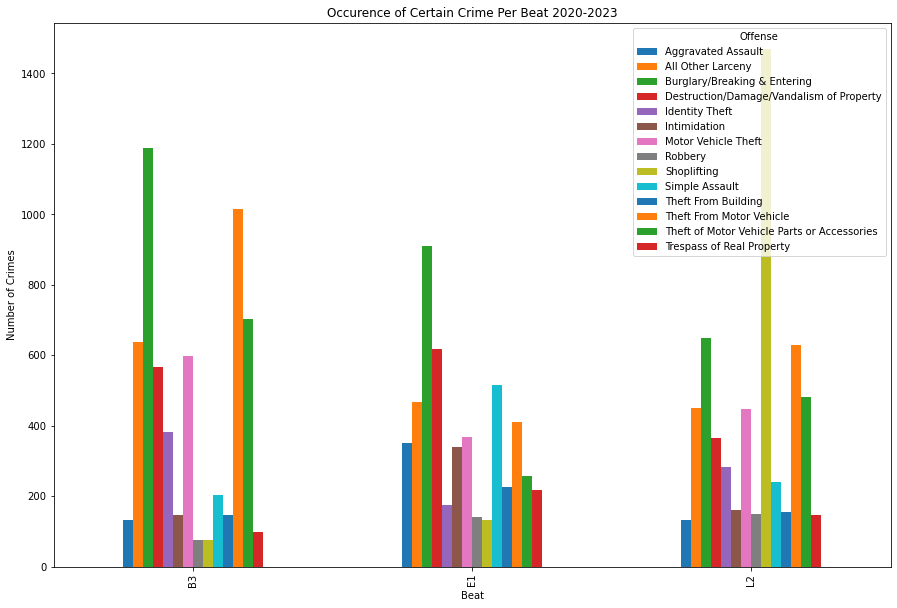

In [62]:
ax = supp_df.unstack().plot.bar(title = "Occurence of Certain Crime Per Beat 2020-2023", figsize = (15,10));
ax.set_ylabel("Number of Crimes");

From our graph we can see that:

* In the B3 Beat, we can see that the top 3 crimes committed over the past 3 years are: Burglarly/Breaking & Entering, Theft From Motor Vehicle, and Theft of Motor Vehicle Parts or Accessories


* In the E1 Beat, we can see that the top 3 crimes committed over the past 3 years are: Burglarly/Breaking & Entering, Destruction/Damage/Vandalism Of Property, and Simple Assault


* In the L2 Beat, we can see that the top 3 crimes committed over the past 3 years are: Shoplifting, Burglarly/Breaking & Entering, and Theft From Motor Vehicle

**When we combine the top classified Beats with our graph results, we can identify more crimes in addition to our model's results. Our favored model best classified Simple Assault crimes and Shoplifting crimes, which is also supported by our graph results, but now we're also aware that Burglarly/Breaking & Entering crimes and Theft From Motor Vehicle crimes are major crimes that have occured over the years. Knowing what kind of crimes are most prevalent in what areas allows us to come up with plans for preventing further crimes, allocate more resources to certain areas, etc. We'll go over these possibilities more in depth in our final conclusion.**

<a id='final_results'></a>

# Final Results #

When it came to our crime type model, our initial CatBoost model was our best model. For our crime location model, our initial CatBoost model was the best model. When it came to type of new crimes, the crimes that our model best classified were Simple Assault and Shoplifting. When it came to location of a new crime, our model best classified new crime as occuring in the B3, E1 and L2 Beat. Lastly, when we put Beat and crime type together, we saw that the top crimes that occured over the past 3 years in the B3, E1 and L2 Beat were Burglarly/Breaking & Entering and Theft From Motor Vehicle crimes. When we put all of this together we can conclude that the areas we should be focused on are the B3, E1, and L2 Beats, while the top crimes that we should be concerned about are Burglarly/Breaking & Entering, Shoplifting, Simple Assault, and Theft From Motor Vehicle crimes. The results for our best crime type classification model can be found [here](#results_cell), while our results for our best crime location classification model can be found [here](#results_cell2). 

# Feature Importance #

**Crime Type Feature Importance**

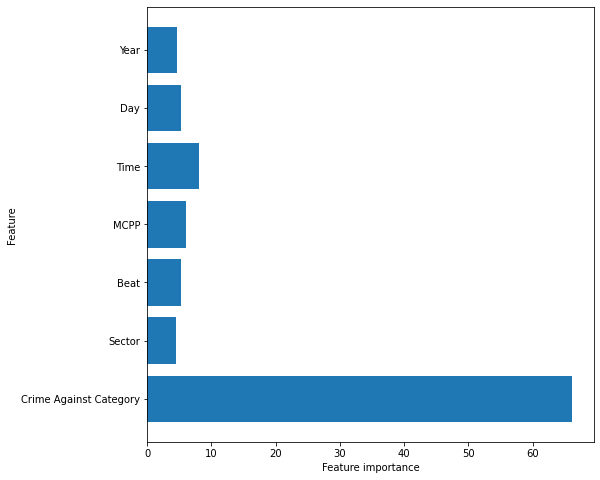

In [63]:
def plot_feature_importances(model):    
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(CBC)

**Crime Location Feature Importance**

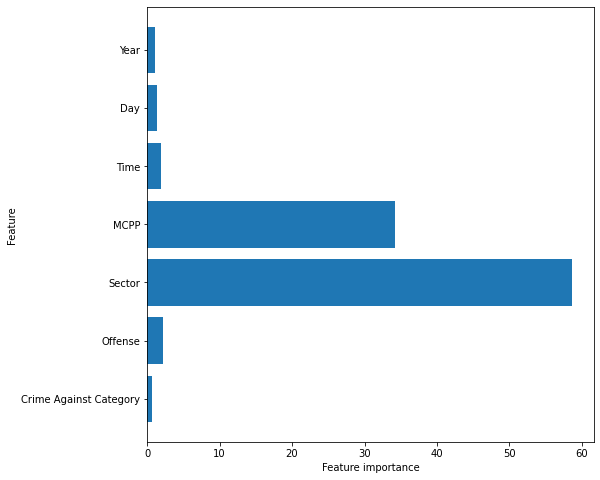

In [64]:
def plot_feature_importances(model):    
    n_features = X_location_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_location.columns) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(CBC_beat)

<a id='conclusion'></a>

# Conclusion #

The goal was to work with the city of Seattle to build two classification models that accurately classify not only types of new crimes, but also location of new crimes. Ideally, when a new crime occurs the models should be able to instantly and accurately predict what type of crime it is and where the crime is occuring. 


For our crime type models, we used both a Random Forest model and a CatBoost model. We also tuned these models further to see if we could improve performance. After comparing the various models, we found that our initial CatBoost model was the best crime type model overall. For crime location, we only used CatBoost models. We compared an initial default CatBoost model and a Grid-search tuned CatBoost model. We found that our initial CatBoost model performed the best. Lastly, we wanted to look at both crime type and crime location together. Because we're running two separate models, we were unable to do that conventionally. However, by looking at our initial dataframe and combining Beat and crime type, we could get a good look at which crimes occured most in which Beat over the past 3 years. We created a separate dataframe from our initial df, and then grouped crime type and location (in the Beats that our crime location model best classified) together, then finally graphed it. We found that Burglarly/Breaking & Entering crimes and Theft From Motor Vehicle crimes were the most prevalent crimes (from 2020-2023) in the B3, E1, and L2 Beats.

When we put all of this together we concluded that the areas we should be focused on for crime were the B3, E1, and L2 Beats, while the top crimes that we should be concerned about were Burglarly/Breaking & Entering, Shoplifting, Simple Assault, and Theft From Motor Vehicle crimes. But what does this all mean for the city of Seattle? We'll discuss more about this in our reccomendation section.


These results are a good starting point, but there's some things that need to be worked on. Our precision, recall and F1 scores were relatively low for our crime type model, so increasing those values would be a great start. On the other hand, for our crime location model, our precision, recall and F1 scores were relatively high, but that was due to overfitting. We'd like to reduce overfitting first, then see what our classification report scores are, and adjust from there. Another thing to be worked on is runtime of our models. Running the various models in this notebook takes about an hour and a half to run. To address our overfitting and low classification report values, we could try using more data. We only used 3 years worth of data (2020-2023), to make runtime feasible and to make our results more readable, but the data ranges from 2008-2023. We also filtered out crimes and locations with value counts less than a certain amount. We could try varying what years we use for our data, and also try not filtering out our crimes/crime locations. For our runtime issue, we would recommend running our model on the GPU more, but that may require the city to invest in more expensive technology, or to rent out cloud GPUS from places like Vast.ai, Google, etc.

<a id='recommendations'></a>

## Recommendations ##

The first recommendations we have are for crime location. We saw that the top Beats that crime was classified to occur in were the B3, E1 and L2 beats. A good starting point then would be those 3 beats. Let's take a look at a partial Beat map of Seattle, and locations of police stations. 

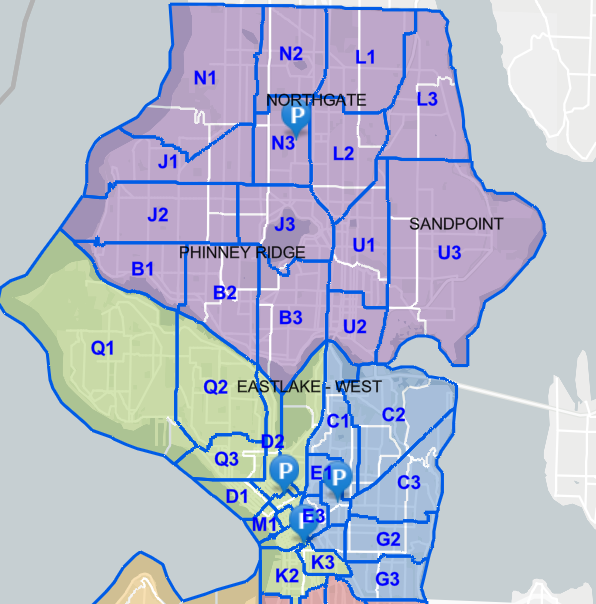

We can see that while South Seattle (where the E1 Beat is located) has several police stations (blue P markers on the map), North Seattle (where Beat B3 and L2 are located) only has one police station. Already this could lead to reduced Police presence, which could lead to reduced responsiveness to crimes. A great suggestion would be to build more (at least one) police stations closer to the B3 Beat. Later on (depending on results) more could be built, potentially around the outskirts of the Q1 and U3 Beat. Another solution would be to allocate some of South Seattle's police force to the northern area, to increase patrol ability and police responsiveness.

We saw that the top crimes in those Beats were Burglarly/Breaking & Entering, Shoplifting, Simple Assault, and Theft From Motor Vehicle. As mentioned earlier, we could increase police patrols and build additional stations around those areas to create faster response times, and potentially deter future crimes simply by presence of police. Another suggestion would be to implement a sort of neighboorhood watch that the police would aid in patrolling the area. Not only would that increase the manpower of people monitoring the area, but may also help improve relations between the police and the public. As our model improves and we gain a clearer picture of crime types and crime locations, we can create more watch programs. When looking at our top crimes, it may also be beneficial to implement the use of security cameras around the city (if not already implemented). That way if these crimes do manage to occur, it will be easier to track down the culprit(s), and may deter future crimes similar to increasing manpower. Lastly, in regards to Theft From Motor Vehicle crimes, it would be greatly beneficial to build more secure and affordable parking garages. This would not only reduce the amount of cars being broken into, but would also create positive feedback from the public, since finding affordable, secure parking in Seattle can be difficult. 


When it comes to implementing the model, it would be beneficial to use it either in police dispatch center, or in the mobile laptops that the police carry with them. This way the notification and response can be almost instantaneous. Another great idea would be to try to implement our model with social media. Any crime or suspicious activity that gets posted online would instantly notify someone of the type and location of the crime. Lastly, it would be great if we could blend the two models together into one Machine Learning model. This may be a complex process, but not impossible. 

If this model is successfully improved and implemented, it could have a huge positive impact on the city of Seattle. 
It would decrease crime, improve police relations with the public, and even have positive side effects like increased tourism and more businesses opening up. Then once proven repeatedly successful, the model can potentially be generalized to other parts of Washington, and even other states.